# ACEA SMART ANALYTICS

The Acea Group is one of the leading Italian multiutility operators. Listed on the Italian Stock Exchange since 1999, the company manages and develops water and electricity networks and environmental services. Acea is the foremost Italian operator in the water services sector supplying 9 million inhabitants in Lazio, Tuscany, Umbria, Molise, Campania.

In this problem we will focus only on the water sector to help Acea Group preserve precious waterbodies. As it is easy to imagine, a water supply company struggles with the need to forecast the water level in a waterbody (water spring, lake, river, or aquifer) to handle daily consumption. During fall and winter waterbodies are refilled, but during spring and summer they start to drain. To help preserve the health of these waterbodies it is important to predict the most efficient water availability, in terms of level and water flow for each day of the year.

## Data

The data source is:  https://www.kaggle.com/c/acea-water-prediction/data

Description of the data
There are nine different datasets, completely independent and not linked to each other. Each dataset can represent a different kind of waterbody. As each waterbody is different from the other, the related features as well are different from each other. So, if for instance we consider a water spring we notice that its features are different from the lake’s one. This is correct and reflects the behavior and characteristics of each waterbody. The Acea Group deals with four different type of waterbodies: water spring (for which three datasets are provided), lake (for which a dataset is provided), river (for which a dataset is provided) and aquifers (for which four datasets are provided).

Let’s see how these nine waterbodies differ from each other.

Waterbody: Auser
Type: Aquifer

Description: This waterbody consists of two subsystems, called NORTH and SOUTH, where the former partly influences the behavior of the latter. Indeed, the north subsystem is a water table (or unconfined) aquifer while the south subsystem is an artesian (or confined) groundwater.

The levels of the NORTH sector are represented by the values of the SAL, PAG, CoS and DIEC wells, while the levels of the SOUTH sector by the LT2 well.

Waterbody: Petrignano
Type: Aquifer

Description: The wells field of the alluvial plain between Ospedalicchio di Bastia Umbra and Petrignano is fed by three underground aquifers separated by low permeability septa. The aquifer can be considered a water table groundwater and is also fed by the Chiascio river. The groundwater levels are influenced by the following parameters: rainfall, depth to groundwater, temperatures and drainage volumes, level of the Chiascio river.

Waterbody: Doganella
Type: Aquifer

Description: The wells field Doganella is fed by two underground aquifers not fed by rivers or lakes but fed by meteoric infiltration. The upper aquifer is a water table with a thickness of about 30m. The lower aquifer is a semi-confined artesian aquifer with a thickness of 50m and is located inside lavas and tufa products. These aquifers are accessed through wells called Well 1, ..., Well 9. Approximately 80% of the drainage volumes come from the artesian aquifer. The aquifer levels are influenced by the following parameters: rainfall, humidity, subsoil, temperatures and drainage volumes.

Waterbody: Luco
Type: Aquifer

Description: The Luco wells field is fed by an underground aquifer. This aquifer not fed by rivers or lakes but by meteoric infiltration at the extremes of the impermeable sedimentary layers. Such aquifer is accessed through wells called Well 1, Well 3 and Well 4 and is influenced by the following parameters: rainfall, depth to groundwater, temperature and drainage volumes.

Waterbody: Amiata
Type: Water spring

Description: The Amiata waterbody is composed of a volcanic aquifer not fed by rivers or lakes but fed by meteoric infiltration. This aquifer is accessed through Ermicciolo, Arbure, Bugnano and Galleria Alta water springs. The levels and volumes of the four sources are influenced by the parameters: rainfall, depth to groundwater, hydrometry, temperatures and drainage volumes.

Waterbody: Madonna di Canneto
Type: Water spring

Description: The Madonna di Canneto spring is situated at an altitude of 1010m above sea level in the Canneto valley. It does not consist of an aquifer and its source is supplied by the water catchment area of the river Melfa.

Waterbody: Lupa
Type: Water spring

Description: this water spring is located in the Rosciano Valley, on the left side of the Nera river. The waters emerge at an altitude of about 375 meters above sea level through a long draining tunnel that crosses, in its final section, lithotypes and essentially calcareous rocks. It provides drinking water to the city of Terni and the towns around it.

Waterbody: Arno
Type: River

Description: Arno is the second largest river in peninsular Italy and the main waterway in Tuscany and it has a relatively torrential regime, due to the nature of the surrounding soils (marl and impermeable clays). Arno results to be the main source of water supply of the metropolitan area of Florence-Prato-Pistoia. The availability of water for this waterbody is evaluated by checking the hydrometric level of the river at the section of Nave di Rosano.

Waterbody: Bilancino
Type: Lake

Description: Bilancino lake is an artificial lake located in the municipality of Barberino di Mugello (about 50 km from Florence). It is used to refill the Arno river during the summer months. Indeed, during the winter months, the lake is filled up and then, during the summer months, the water of the lake is poured into the Arno river.

Each waterbody has its own different features to be predicted. The table below shows the expected feature to forecast for each waterbody.



It is of the utmost importance to notice that some features like rainfall and temperature, which are present in each dataset, don’t go alongside the date. Indeed, both rainfall and temperature affect features like level, flow, depth to groundwater and hydrometry some time after it fell down. This means, for instance, that rain fell on 1st January doesn’t affect the mentioned features right the same day but some time later. As we don’t know how many days/weeks/months later rainfall affects these features, this is another aspect to keep into consideration when analyzing the dataset.

A short, tabular description of the waterbodies is available also downloading all datasets.

More information about the behavior of each kind of waterbody can be found at the following links:

Aquifer https://en.wikipedia.org/wiki/Aquifer

Water spring https://en.wikipedia.org/wiki/Spring_(hydrology)

River https://en.wikipedia.org/wiki/River

Lake https://en.wikipedia.org/wiki/Lake

## Problem
Can you build a story to predict the amount of water in each unique waterbody? The challenge is to determine how features influence the water availability of each presented waterbody. To be more straightforward, gaining a better understanding of volumes, they will be able to ensure water availability for each time interval of the year.

The time interval is defined as day/month depending on the available measures for each waterbody. Models should capture volumes for each waterbody(for instance, for a model working on a monthly interval a forecast over the month is expected).

The desired outcome is a notebook that can generate four mathematical models, one for each category of waterbody (acquifers, water springs, river, lake) that might be applicable to each single waterbody.


In [7]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://www.googleapis.com/download/storage/v1/b/kaggle-user-content/o/inbox%2F6195295%2Fcca952eecc1e49c54317daf97ca2cca7%2FAcea-Input.png?generation=1606932492951317&alt=media")

## Exploratory Data Analysis

Let us first analyze the role of each feature of a waterbody category (water spring, lake, river, or aquifer) in the prediction of their respective target feature. This is done using EDA as below

In [10]:
#Read and find insights in the data set
#let's import the necessary libraries to work with.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [11]:
#reading the datasets to different data frames
aquifer_auser= pd.read_csv("E:\Studies\Kaggle\Acea Smart Water Analytics\Aquifer_Auser.csv")
aquifer_doganella= pd.read_csv("E:\Studies\Kaggle\Acea Smart Water Analytics\Aquifer_Doganella.csv")
aquifer_petrignano= pd.read_csv("E:\Studies\Kaggle\Acea Smart Water Analytics\Aquifer_Petrignano.csv")
aquifer_luco= pd.read_csv("E:\Studies\Kaggle\Acea Smart Water Analytics\Aquifer_Luco.csv")
spring_amiata= pd.read_csv("E:\Studies\Kaggle\Acea Smart Water Analytics\Water_Spring_Amiata.csv")
spring_lupa= pd.read_csv("E:\Studies\Kaggle\Acea Smart Water Analytics\Water_Spring_Lupa.csv")
spring_madonna= pd.read_csv("E:\Studies\Kaggle\Acea Smart Water Analytics\Water_Spring_Madonna_di_Canneto.csv")
river_arno= pd.read_csv("E:\Studies\Kaggle\Acea Smart Water Analytics\River_Arno.csv")
lake_bilancino= pd.read_csv("E:\Studies\Kaggle\Acea Smart Water Analytics\Lake_Bilancino.csv")

# General properties and statistics of each dataset

In [28]:
# lets put them all in a list to simplify iterating for EDA purpose
wb_datasets = [ aquifer_auser, aquifer_doganella, aquifer_luco, aquifer_petrignano,
                         lake_bilancino, river_arno, spring_amiata, spring_lupa, spring_madonna]

wb_names = ['Aquifer_Auser', 'Aquifer_Doganella', 'Aquifer_Luco', 'Aquifer_Petrignano',
                    'Lake_Bilancino','River_Arno', 'Water_Spring_Amiata','Water_Spring_Lupa',
                      'Water_Spring_Madonna_di_Canneto']

In [29]:
#Lets start the iteration
for wb in range(9):
    print('='*70)
    print(' '*25,wb_names[wb].upper(),' '*25)
    print('\n')
    
    #Print the number of rows and columns in a dataset
    print('Number of records: {}    Number of features: {}'.format(wb_datasets[wb].shape[0],
                                                                wb_datasets[wb].shape[1]))
    print('\n')
    
    #Check for presence of missing values - NANs if any
    print('Do missing values exist in any feature? :', wb_datasets[wb].isnull().values.any())
    print('\n')
    
    #Print all the unique datatypes in all columns in the dataset
    print('Unique data types of features: \n\n',wb_datasets[wb].dtypes.unique())
    print('\n')
    
    #Print non-null count, dtypes with column name of each column
    print('General information of complete dataset: \n\n')
    wb_datasets[wb].info()
    print('\n')
    
    #Print stats like count, mean, standard dev etc of each column
    print('Statistical summary of the numerical value features: \n\n',wb_datasets[wb].describe().T)

                          AQUIFER_AUSER                          


Number of records: 8154    Number of features: 27


Do missing values exist in any feature? : True


Unique data types of features: 

 [dtype('O') dtype('float64')]


General information of complete dataset: 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8154 entries, 0 to 8153
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Date                                     8154 non-null   object 
 1   Rainfall_Gallicano                       5295 non-null   float64
 2   Rainfall_Pontetetto                      5295 non-null   float64
 3   Rainfall_Monte_Serra                     5289 non-null   float64
 4   Rainfall_Orentano                        5295 non-null   float64
 5   Rainfall_Borgo_a_Mozzano                 5295 non-null   float64
 6   Rainfall_Piaggione                       4930 non

## Observations

- The Aquifer Auser dataset has 8154 records with 27 features but it has missing values. The data types through out the dataset are two namely object and float, the object type being the date column and the rest of the features being float type. The date column and temperature features all have non null values. The maximum rainfall recorded in any area is 318.8mm, temperature recorded in any area was at a minimum of -7.85 degrees celcius while the maximum temperature in any area is 31.0 degrees celcius.The maximum volume of water in any area -4114.67 cubic meters and the minimum is -7757.258 cubic meters.There is a minimum hydrometry of -1.19 meters and maximum of 3.69metres. It shows a minimum depth to ground water of -15.31 meters and a maximum of -0.09 meters.
- The aquifer Doganella dataset has a total of 6026 records with 22 features, it also has missing values in its features, with two main data types object and float. The date column has the object type while the rest are floats. The maximum rainfall recorded in any area is 112.60mm with a minimum of 0.0mm, temperature recorded in that area was at a maximum of 30.40 degrees celcius and a minimum of -3.62 degrees celcius. The maximum volume of water at any area is 8360.21 cubic metres,  It shows maximum depth to groundwater at -117.8 metres from ground at Pozzo3 and minimum at -20.31 m at Pozzo1.
- The Aquifer Luca has 7487 observations with 22 features including date. The date column is object type and rest are having float type. Only the Date and temperature features has all non-null values. Max Rainfall recorded in any area is 794 mm, temperature recorded in any area is minimum at -5.25 to 31.85 °C, maximum volume of water at -295.37 cubic meters. It shows maximum depth to groundwater at -295.37 metres from ground at Pozzo3 and minimum at 0 m at Pozzo3.
- The Aquifer Petrignano has 5223 observations with 8 features including date. The date column is object type and rest are having float type. Only the Date feature has all non-null values. Max Rainfall recorded in any area is 67.30 mm, temperature recorded in any area is minimum at -4.2 to 33 °C, maximum volume of water at -45544.896 cubic meters. It shows maximum depth to groundwater at -34.47 metres from ground at P24 and minimum at -19.10 m at P24.
-  Lake Bilancino has 6603 observations with 9 features including date. The date column is object type and rest are having float type. Only the Date and Lake Level features have all non-null values. Max Rainfall recorded in any area is 120.20 mm, temperature recorded in any area is minimum at -5.35 to maximum 34 °C. It shows maximum lake level at 243.53 metres and minimum at 252.76. It shows maximum flow rate at 0.31 and minimum at 74.65 cubic meters per seconds.
- The River Arno has 8217 observations with 17 features including date. The date column is object type and rest are having float type. Only the Date and Lake Level features have all non-null values. Max Rainfall recorded in any area is 126 mm, temperature recorded in any area is maximum at 34.9 °C. It shows maximum lake level at 243.53 metres and minimum at 252.76. It shows maximum hydrometry at 6.75 meters.
- The water spring Amiata has 7487 observations with 16 features including date. The date column is object type and rest are having float type. Only the Date and Temperature_S_Fiora features have all non-null values. Max Rainfall recorded in any area is 228.5 mm, temperature recorded in any area is minimum at -8.95 to maximum 30.15 °C. It shows minimum flow rate at -26.08 and maximum at 0 litres per seconds.
- The water spring Lupa has 4199 observations with 3 features including date. The date column is object type and rest are having float type. Only the Date and Rainfall_Terni features have all non-null values. Max Rainfall recorded in any area is 76 mm. It shows minimum flow rate at -182.31 and maximum at 0 litres per seconds.
- The water spring Madonna Di Canneto has 3113 observations with 4 features including date. The date column is object type and rest are having float type. No features have all non-null values. Max Rainfall recorded in any area is 140.8 mm, temperature recorded in any area is minimum at -4.9 to maximum 31.1 °C. It shows minimum flow rate at 187.7 and maximum at 300.16 litres per seconds.

### Missing value count for each feature across the 9 datasets



                                                   AQUIFER_AUSER                                                   




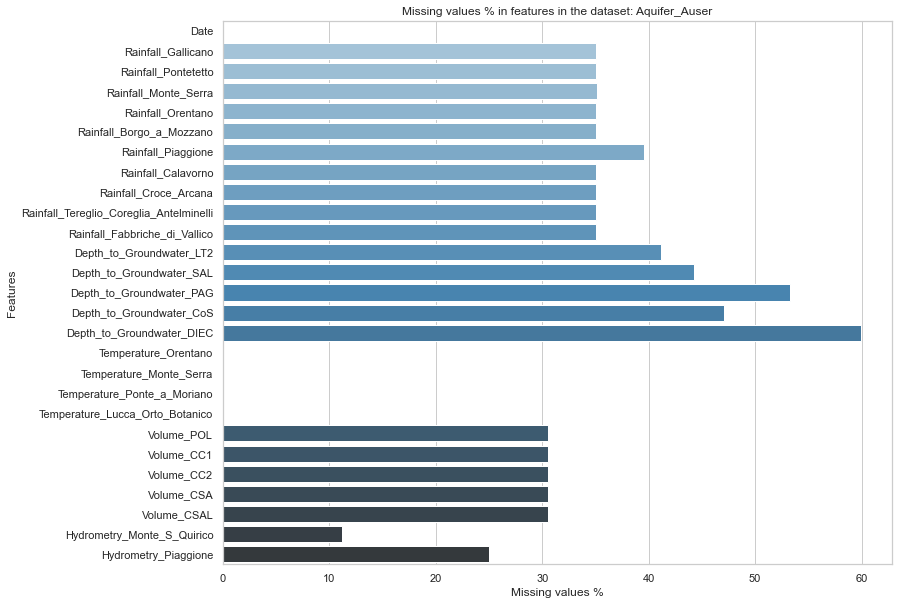



                                                   AQUIFER_DOGANELLA                                                   




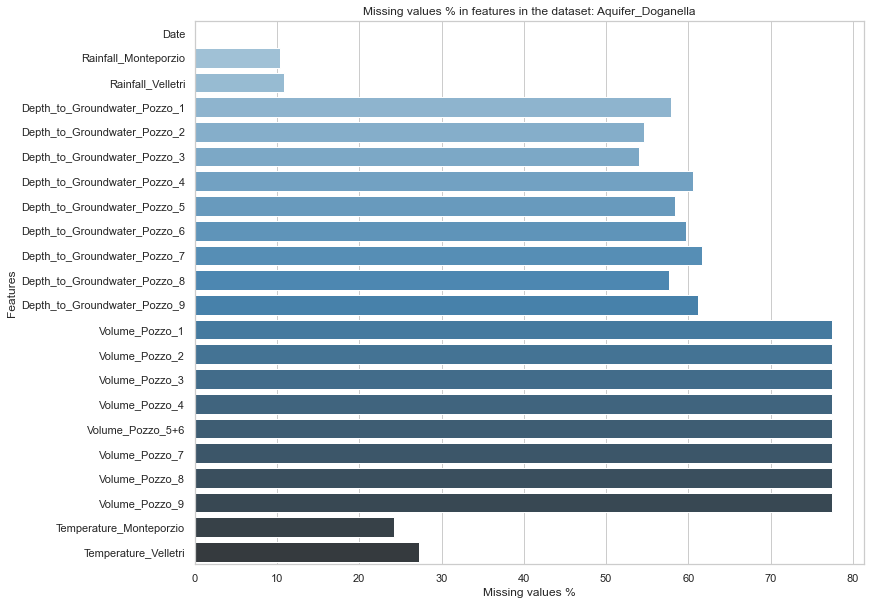



                                                   AQUIFER_LUCO                                                   




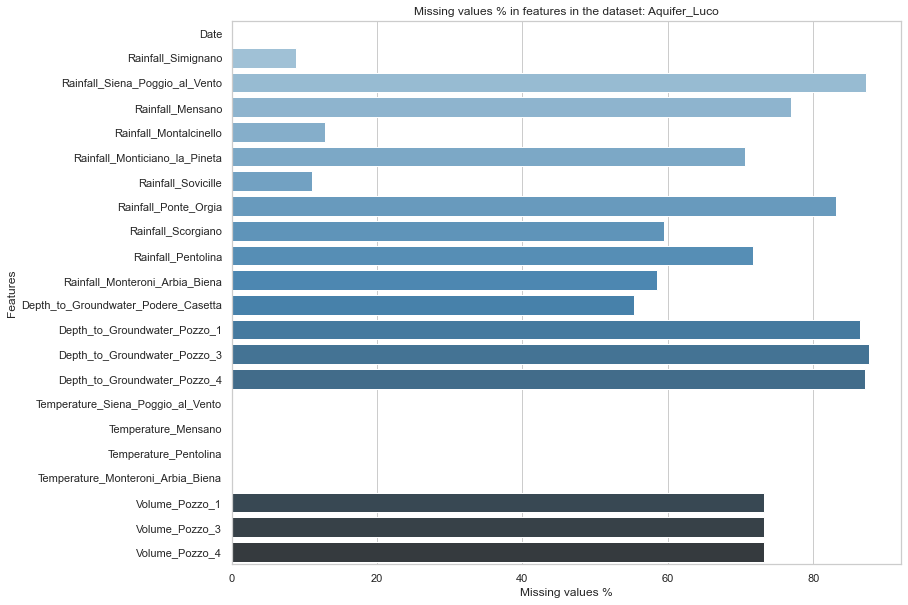



                                                   AQUIFER_PETRIGNANO                                                   




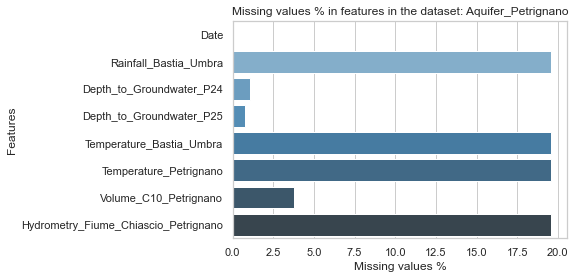



                                                   LAKE_BILANCINO                                                   




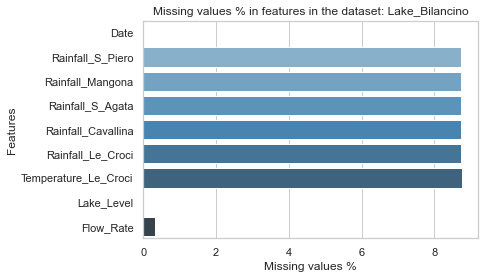



                                                   RIVER_ARNO                                                   




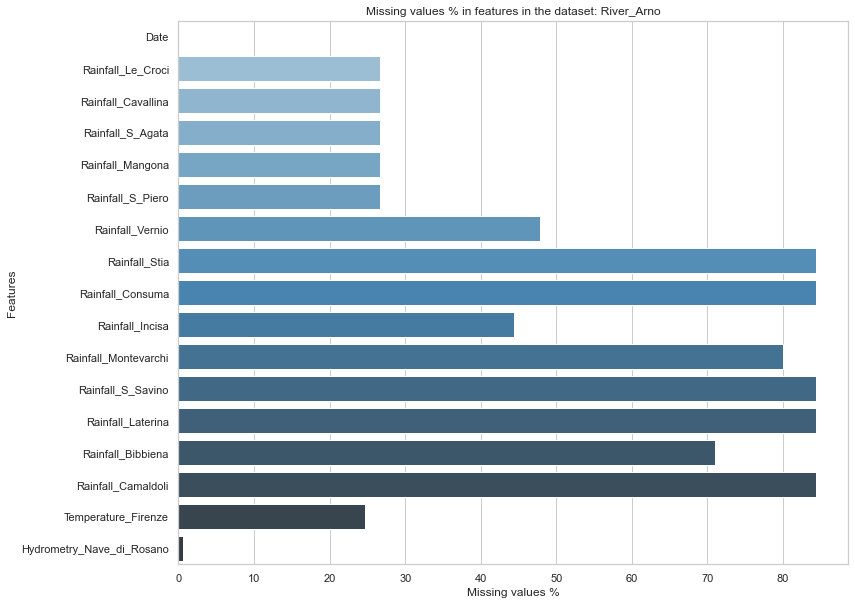



                                                   WATER_SPRING_AMIATA                                                   




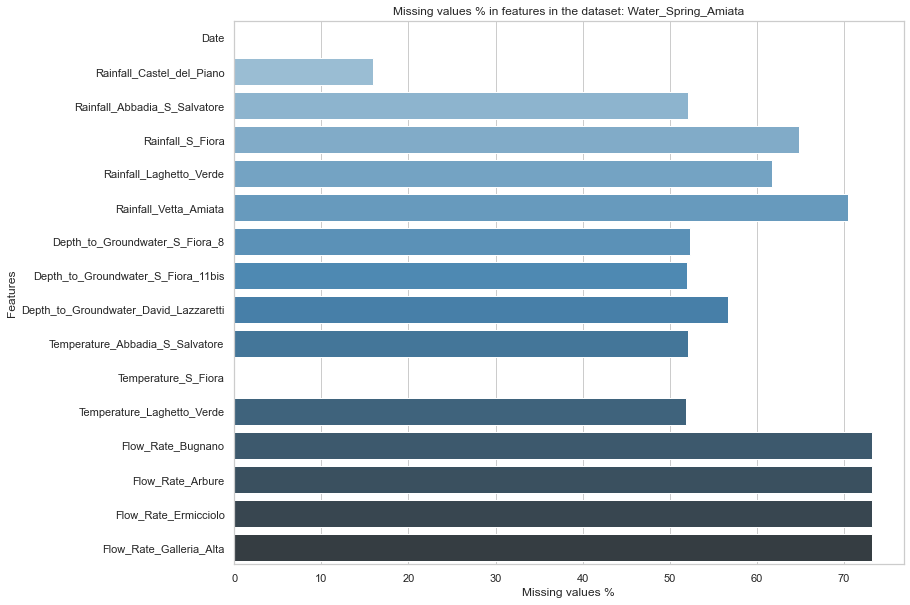



                                                   WATER_SPRING_LUPA                                                   




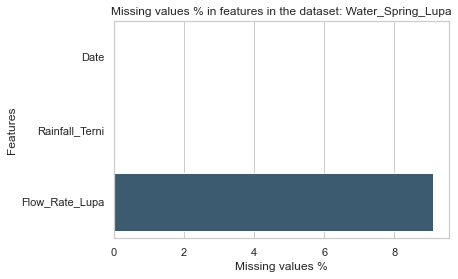



                                                   WATER_SPRING_MADONNA_DI_CANNETO                                                   




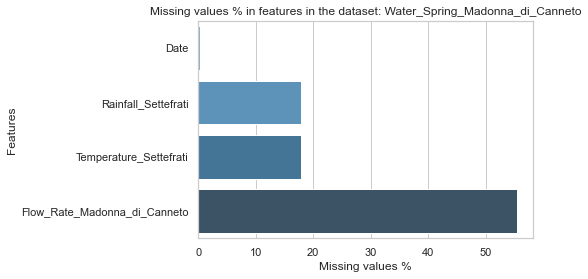

In [36]:
#Iterate over all 9 datasets
for wb in range(9):
    print('='*120)
    print('\n')
    print(' '*50,wb_names[wb].upper(),' '*50)
    print('\n')
    
    #calculate the count and percentage of missing values in each column of the dataset
    missing_count = wb_datasets[wb].isnull().sum()
    missing_perc = (missing_count/len(wb_datasets[wb]))*100
    
    # create a dataframe with the missing count and missing percentage values
    missing_df = pd.DataFrame(missing_count,missing_perc)
    
    #if number of features is greater than 10 then we create a larger figure size for better visuals
    if(len(wb_datasets[wb].columns)>10):
        plt.figure(figsize=(12,10))
        
    # plot a barplot with missing values % and feature names
    sns.barplot(y = missing_count.index, x = missing_perc.values,data = missing_df, orient= 'h', palette="Blues_d")
    
    
    #set the plot x label, y label and the figure's title
    plt.title('Missing values % in features in the dataset: '+wb_names[wb])
    plt.ylabel('Features')
    plt.xlabel('Missing values %')
    plt.show()

## Observations

- For Aquifer Auser, the maximum number of missing values is in feature Depth_to_Groundwater_DIEC with about 60% missing values and apart from the non-null features, the minimum number of missing values is in feature Hydrometry_Monte_S_Quirico with about 11% missing values.
- For Aquifer Doganella, the maximum number of missing values is in the Volume features with about 78% missing values and apart from the non-null features, the minimum number of missing values is in Rainfall features with about 10% missing values.
- For Aquifer Luco, the maximum number of missing values is in the features of Depth_to_Groundwater and Rainfall_Siena_Poggio_al_Vento and Rainfall_Ponte_Orgia with about 80 to 85% missing values and apart from the non-null features, the minimum number of missing values is in feature Rainfall_Simignano with about 6% missing values.
- For Aquifer Petrignago, the maximum number of missing values is in the features Rainfall_Bastia_Umbra, Temperature_Bastia_Umbra, Temperature_Petrignano and Hydrometry_Fiume_Chiascio_Petrignano with about 20% missing values and apart from the non-null features, the minimum number of missing values is in feature Depth_to_Groundwater_P24, Depth_to_Groundwater_P25 with about 1% missing values.
- For Lake Bilancino, the maximum number of missing values is in the Rainfall and Temperature features with about 85% missing values and apart from the non-null features, the minimum number of missing values is in feature Flow_Rate with about 0.2% missing values.
- For River Arno, the maximum number of missing values is in features Rainfall_Stia, Rainfall_Consuma, Rainfall_Montevarchi,  Rainfall_S_Savino, Rainfall_Laterina, Rainfall_Camaldoli with about 85% missing values and apart from the non-null features, the minimum number of missing values is in feature Hydrometry_Nave_di_Rosano with about 1% missing values.
- For Water Spring Amiata, the maximum number of missing values is in feature Rainfall_S_Fiora, Rainfall_Laghetto_Verde, Rainfall_Vetta_Amiata and Flow Rate features with about 72% missing values and apart from the non-null features, the minimum number of missing values is in feature Rainfall_Castel_del_Piano with about 15% missing values.
- For Water Spring Lupa, the maximum number of missing values is in feature Flow_Rate_Lupa with about 9% missing values
- For Water Spring Madonna Di Canneto, the maximum number of missing values is in feature Flow_Rate_Madonna_di_Canneto with about 55% missing values and apart from the non-null features, the minimum number of missing values is in features Rainfall_Settefrati and Temperature_Settefrati with about 18% missing values.

## Correlation in features



                                                   AQUIFER_AUSER                                                   




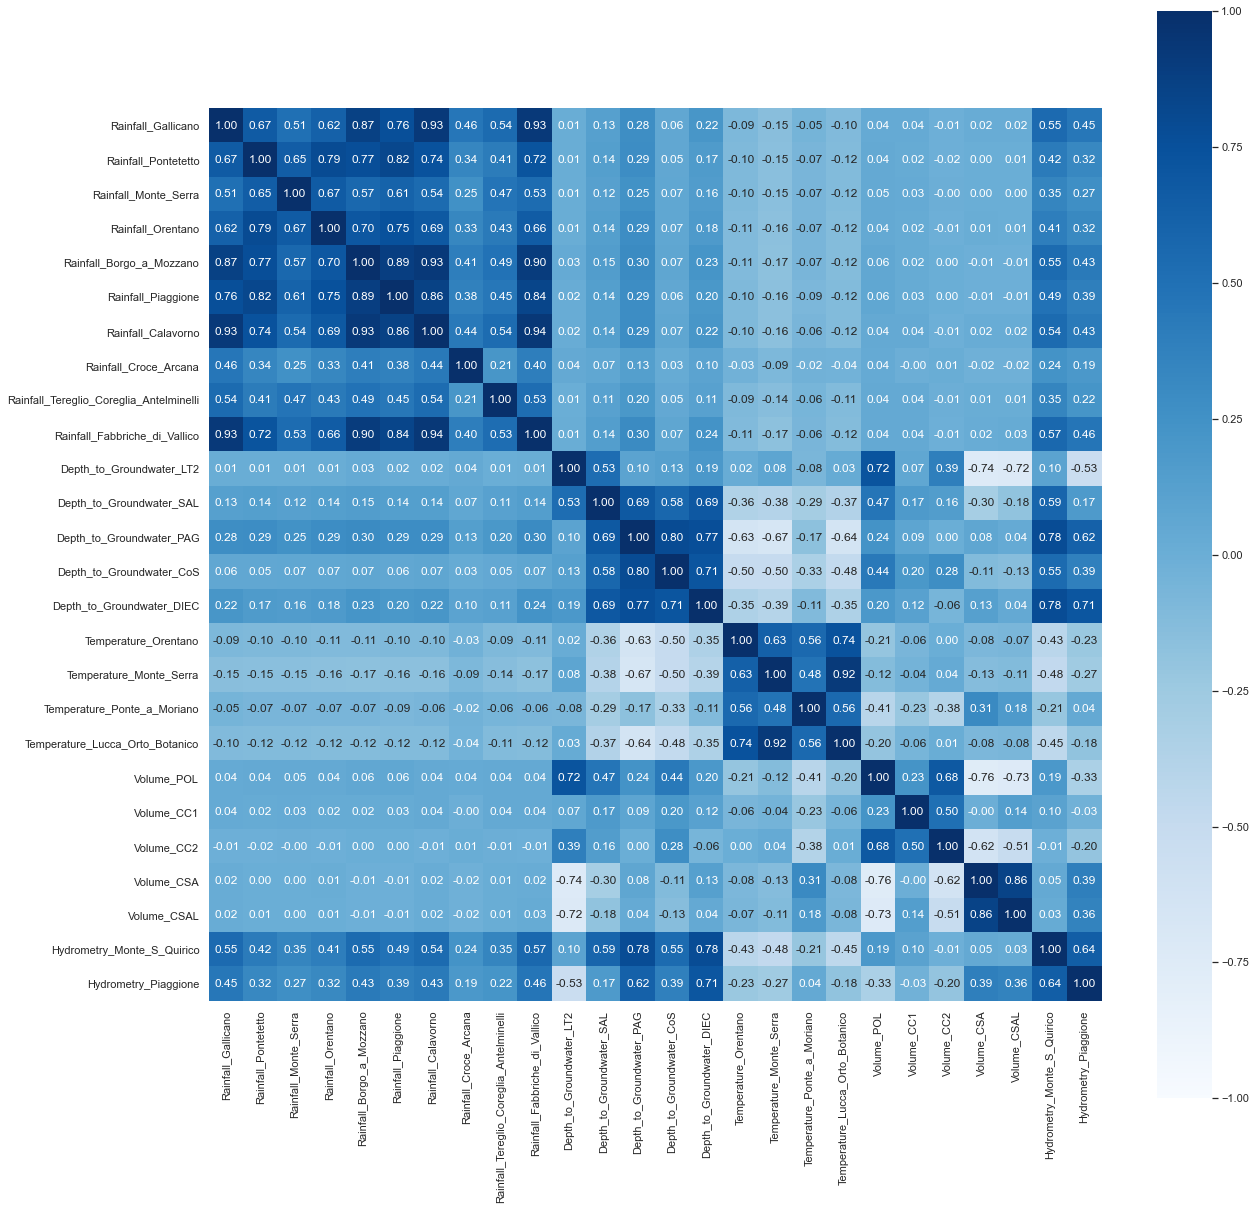



                                                   AQUIFER_DOGANELLA                                                   




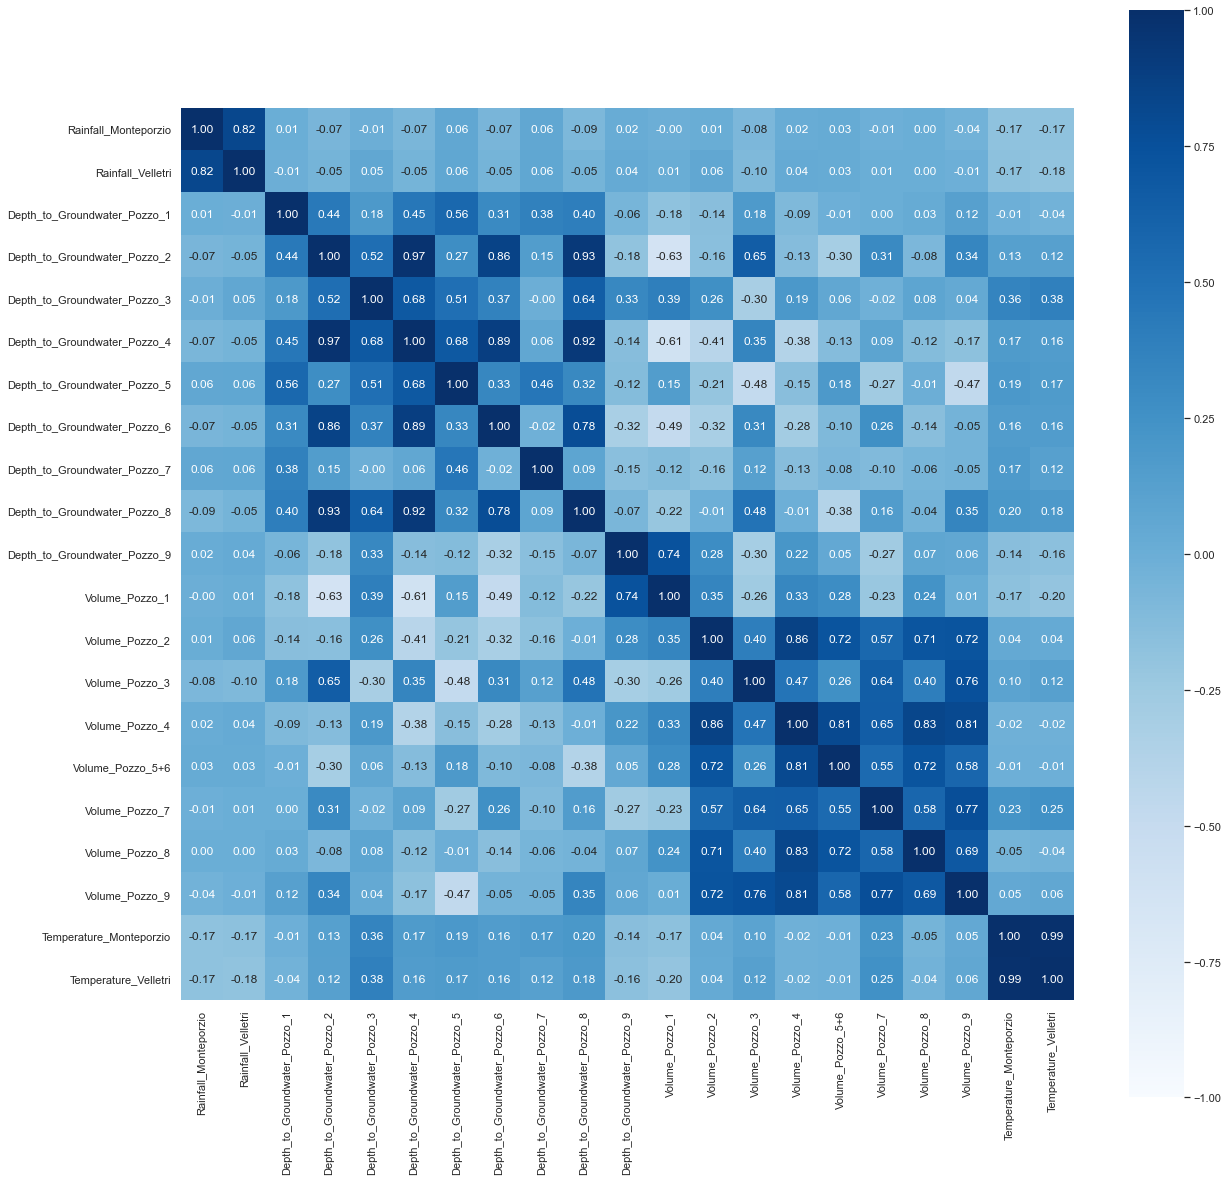



                                                   AQUIFER_LUCO                                                   




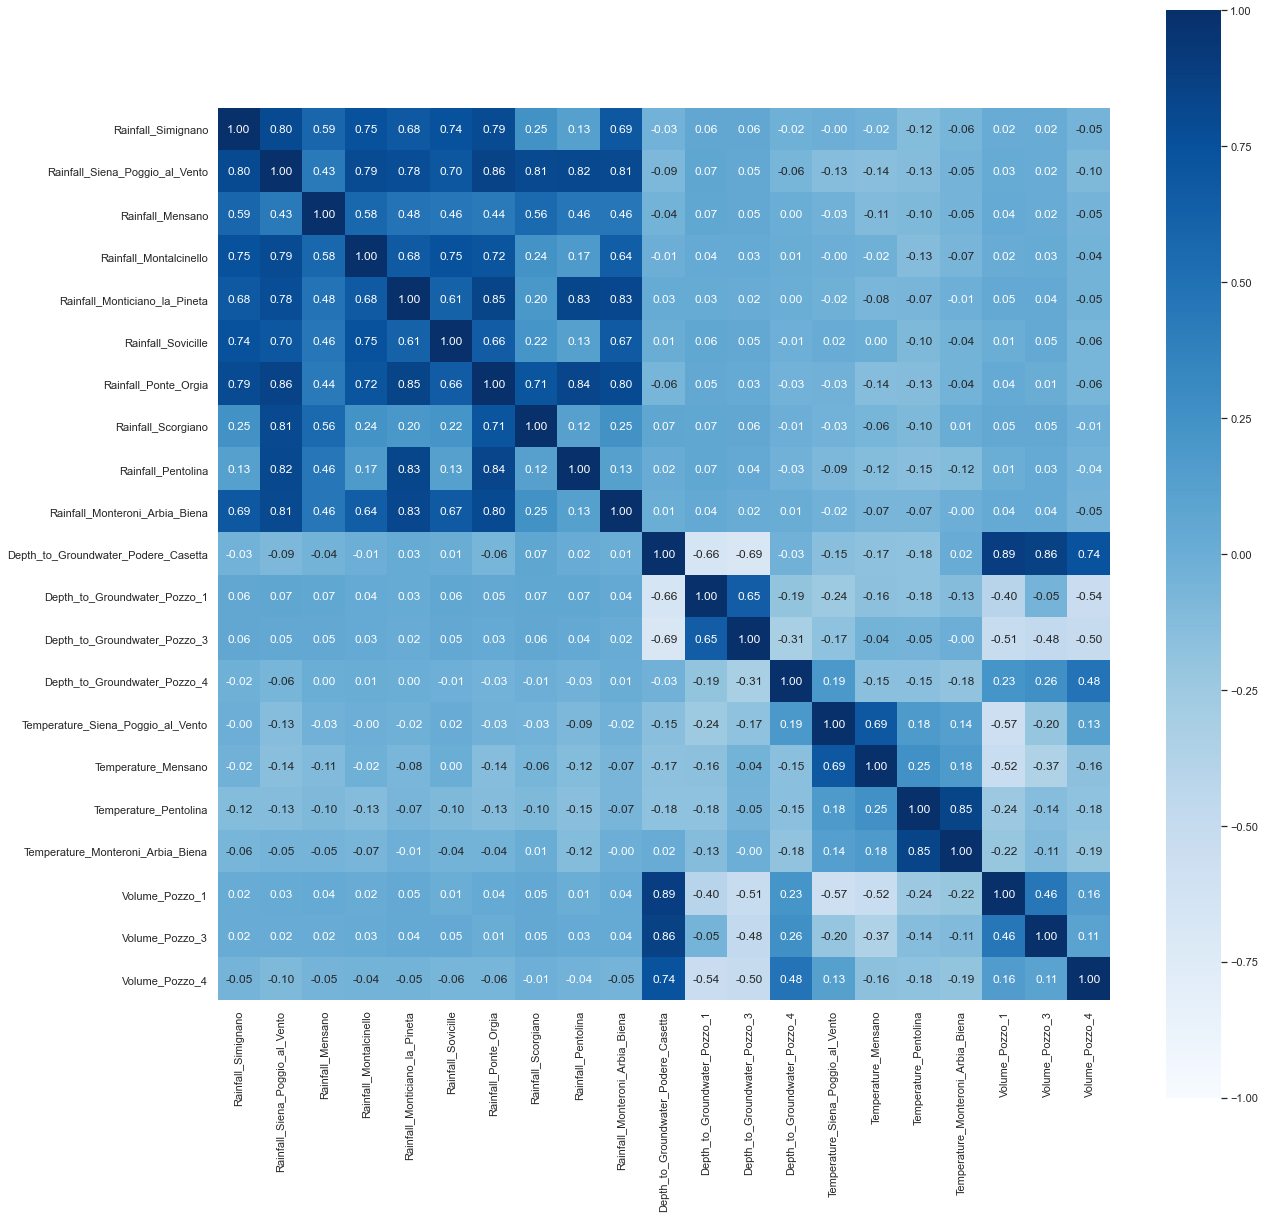



                                                   AQUIFER_PETRIGNANO                                                   




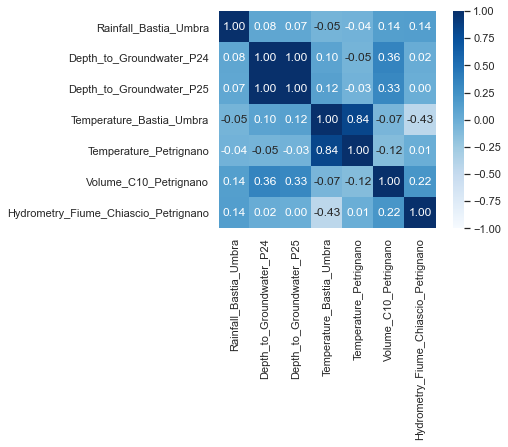



                                                   LAKE_BILANCINO                                                   




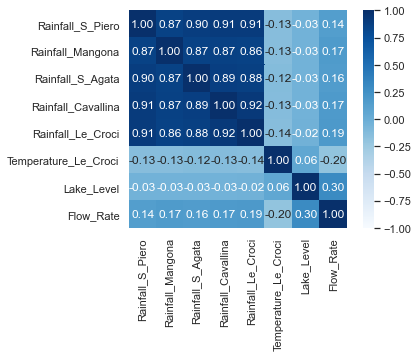



                                                   RIVER_ARNO                                                   




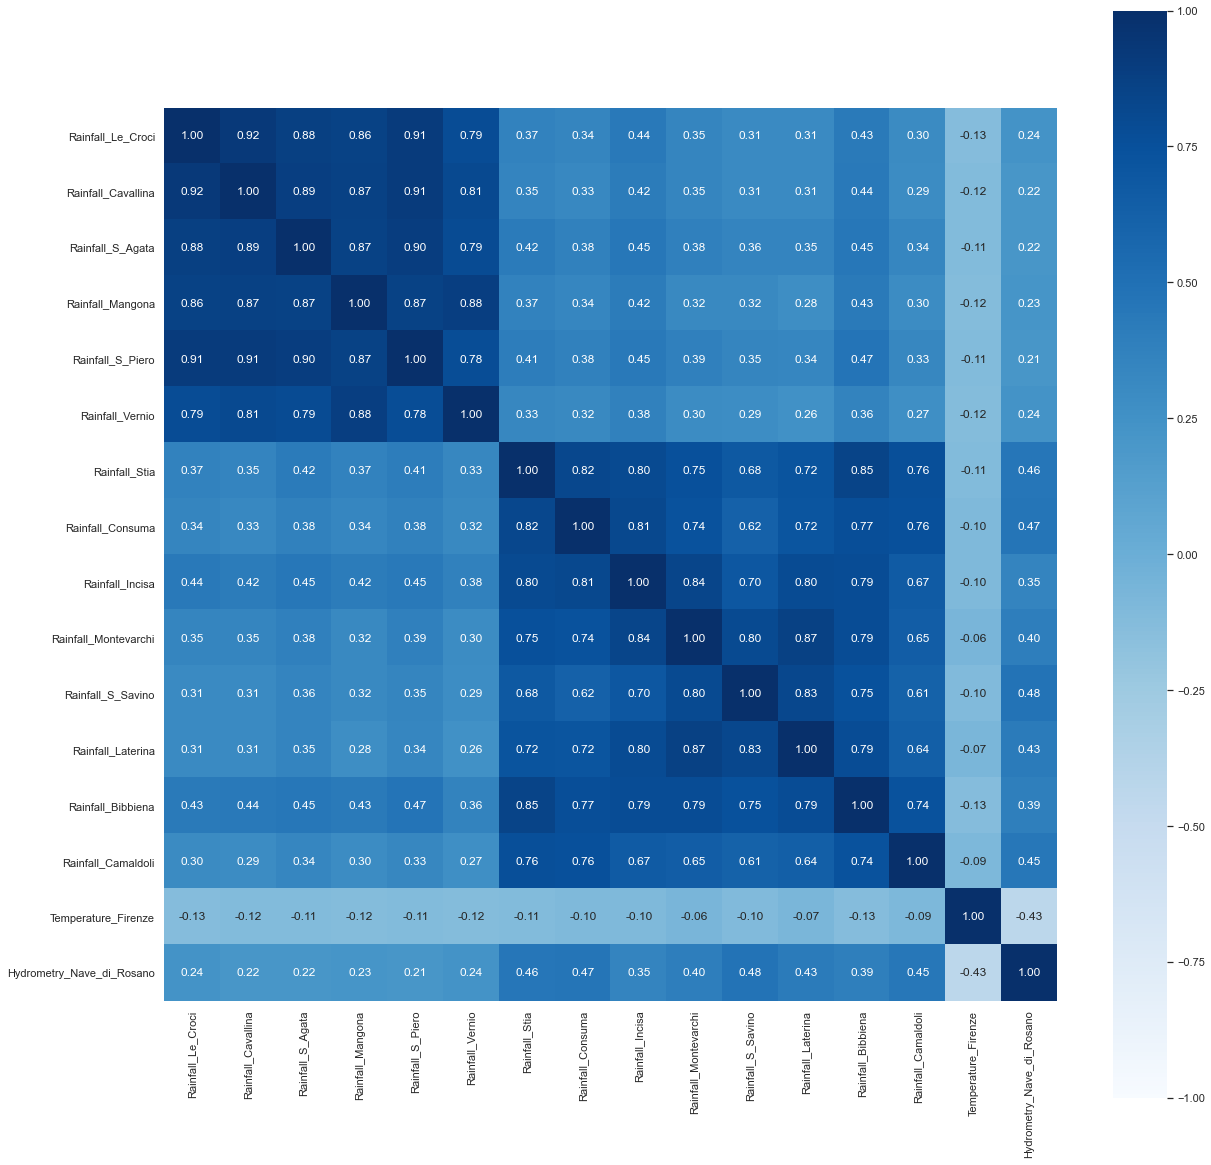



                                                   WATER_SPRING_AMIATA                                                   




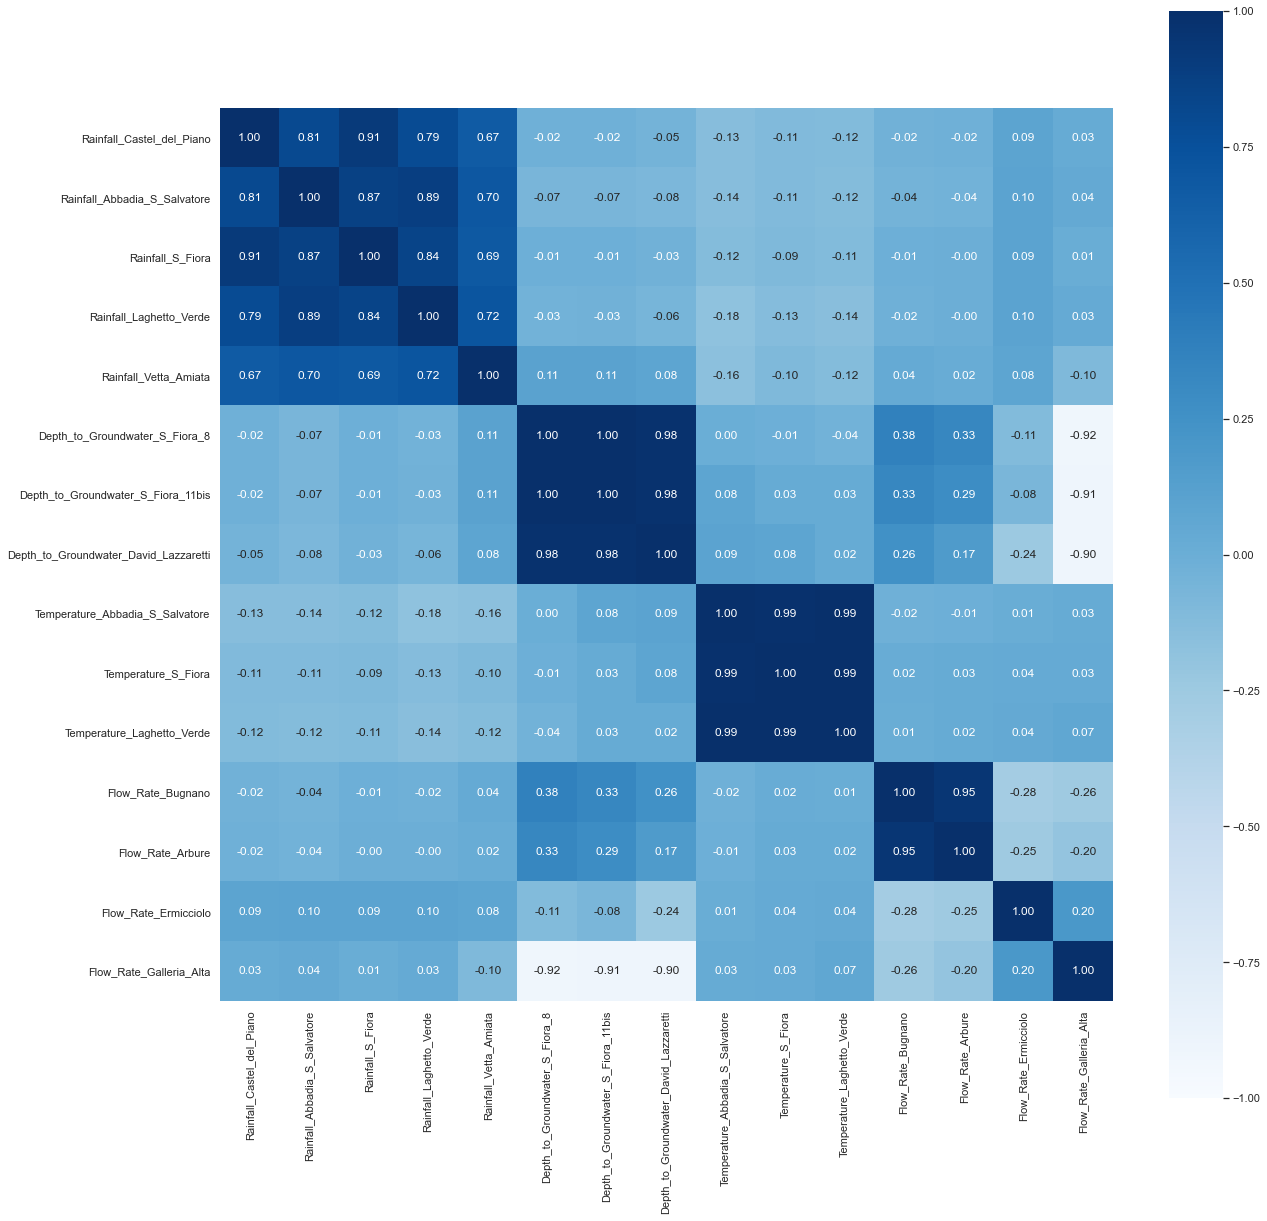



                                                   WATER_SPRING_LUPA                                                   




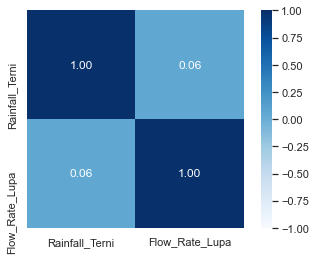



                                                   WATER_SPRING_MADONNA_DI_CANNETO                                                   




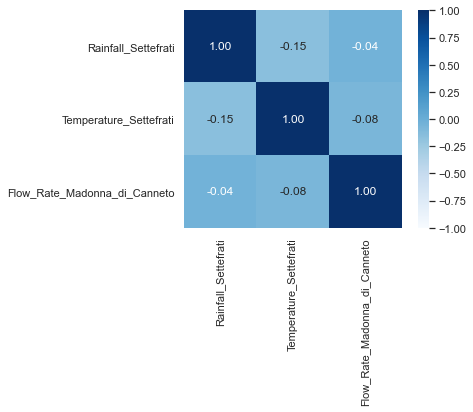

In [37]:
# Iterate over all 9 datasets
for wb in range(9):
    print('='*120)
    print('\n')
    print(' '*50,wb_names[wb].upper(),' '*50)
    print('\n')
    
    #if number of features is greater than 10 then we create a larger figure size for better visuals
    if(len(wb_datasets[wb].columns)>10):
        plt.figure(figsize=(20,20))
        
        
    # plot heatmap to find correlation in the dataset features
    sns.heatmap(wb_datasets[wb].corr(),annot=True, fmt='.2f',vmin=-1, vmax=1, center=0, cmap='Blues', square=True)
    plt.show()

## Observations
- For Aquifer Auser, positively strongly correlated features are Rainfall_Gallicano, Rainfall_Borgo_a_Mozzano, Rainfall_Calavorno, Rainfall_Fabbriche_di_Vallico, Rainfall_Piaggione and negatively strongly correlated features are Volume_CSA, Volume_CSAL,Volume_POL, Depth_to_Groundwater_LT2, Depth_to_Groundwater_LT2.
- For Aquifer Doganella, positively strongly correlated features are Rainfall_Velletri, Depth_to_Groundwater_Pozzo_2, Depth_to_Groundwater_Pozzo_4, Depth_to_Groundwater_Pozzo_6, Depth_to_Groundwater_Pozzo_8, Volume_Pozzo_8, Volume_Pozzo_9 and negatively strongly correlated features are Volume_Pozzo_1, Depth_to_Groundwater_Pozzo_2, Depth_to_Groundwater_Pozzo_4.
- For Aquifer Luco, positively strongly correlated features are Rainfall_Simignano, Rainfall_Siena_Poggio_al_Vento, Rainfall_Monticiano_la_Pineta, Rainfall_Ponte_Orgia,Rainfall_Monteroni_Arbia_Biena, Depth_to_Groundwater_Podere_Casetta, Volume_Pozzo_1, Volume_Pozzo_3 and negatively strongly correlated features are Depth_to_Groundwater_Podere_Casetta, Depth_to_Groundwater_Pozzo_1, Depth_to_Groundwater_Pozzo_3.
- For Aquifer Petrignago, positively strongly correlated features are Depth_to_Groundwater_P24, Depth_to_Groundwater_P25, Temperature_Bastia_Umbra, Temperature_Petrignano and negatively correlated features are Temperature_Bastia_Umbra, Hydrometry_Fiume_Chiascio_Petrignano.
- For Lake Bilancino, positively strongly correlated features are Rainfall_S_Piero, Rainfall_Mangona, Rainfall_S_Agata, Rainfall_Cavallina, Rainfall_Le_Croci and no features are strongly negatively correlated.
- For River Arno, positively strongly correlated features are all rainfall features and temperature feature is weakly negatively correlated.
- For Water Spring Amiata, positively strongly correlated features are all rainfall features, all temperature features, all depth to groundwater features, Flow_Rate_Bugnano, Flow_Rate_Arbure and Flow_Rate_Galleria_Alta feature is negatively correlated feature to all depth to groundwater features.
- For Water Spring Lupa, rainfall and flow rate features are not much correlated.
- For Water Spring Madonna, rainfall,temperature and flow rate features are not much correlated or weakly negatively correlated.

## Boxplot and Histogram of features



                                                   AQUIFER_AUSER                                                   




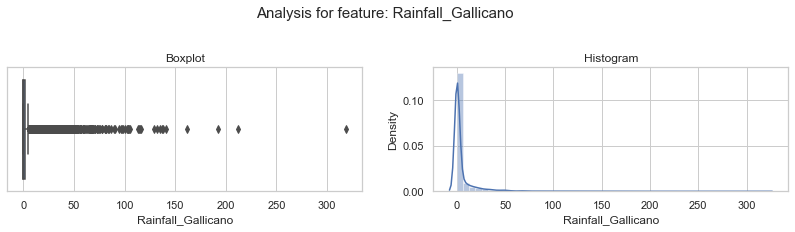

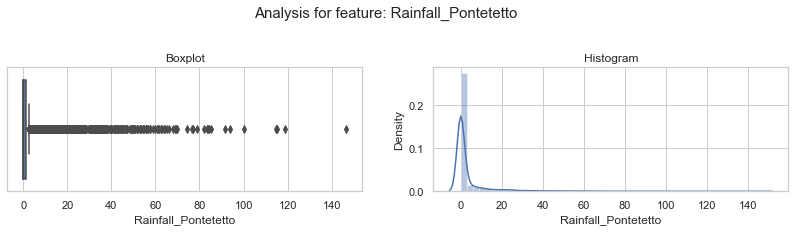

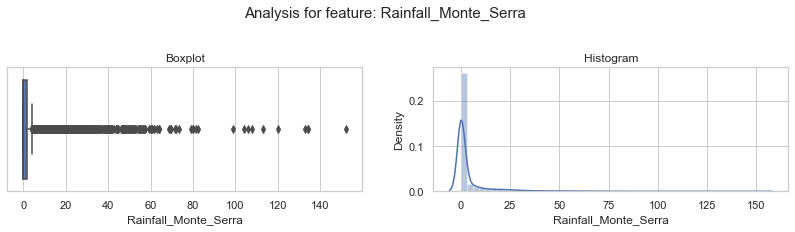

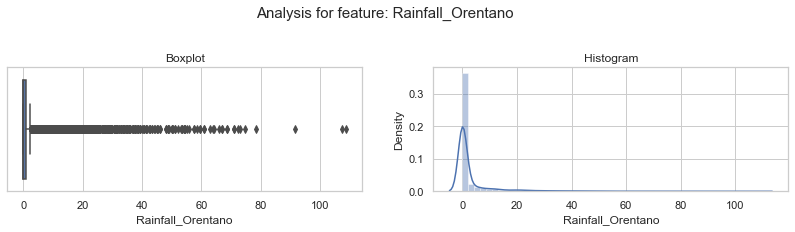

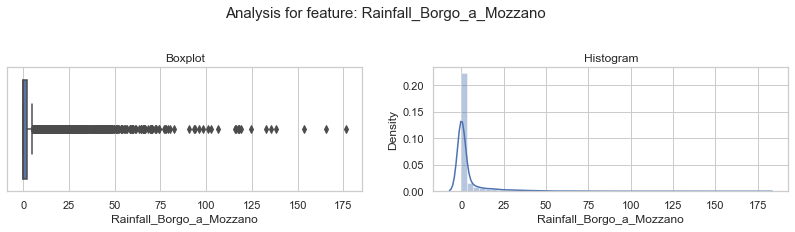

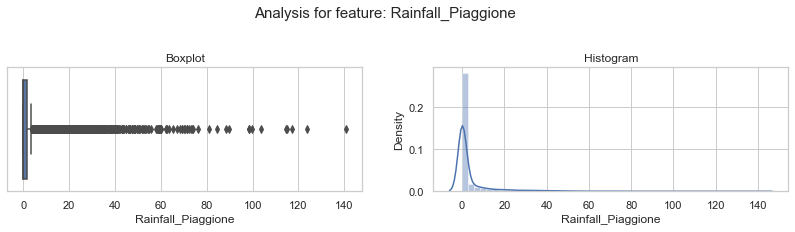

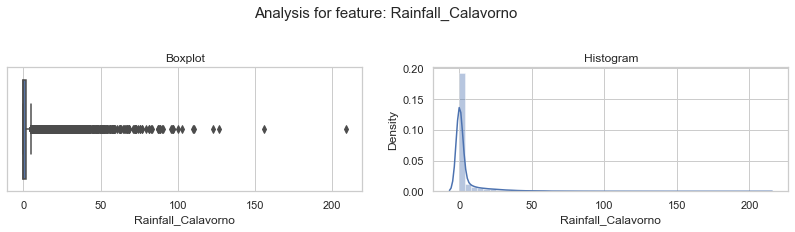

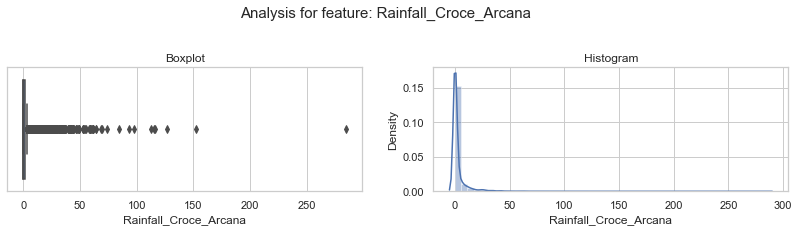

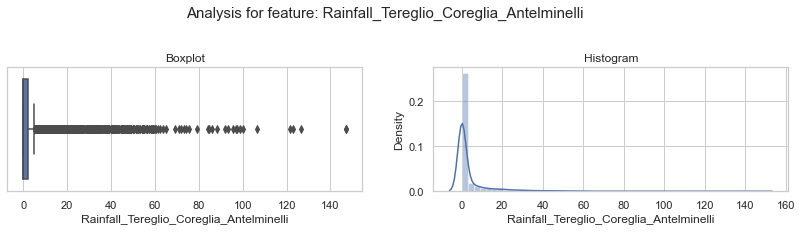

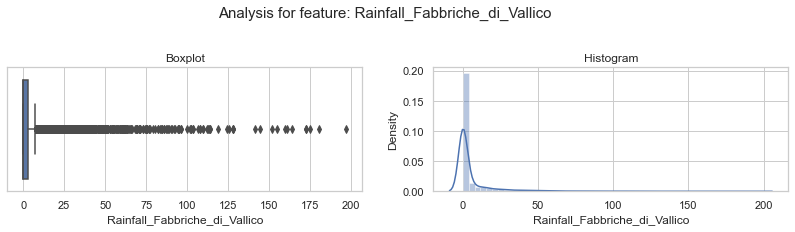

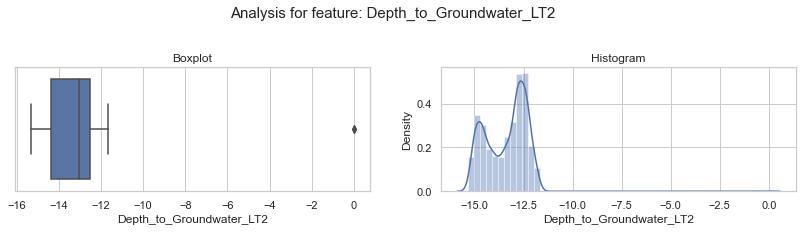

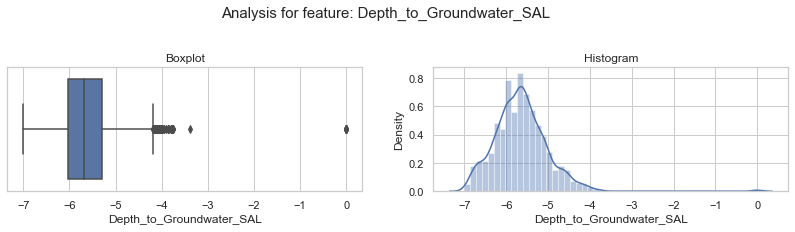

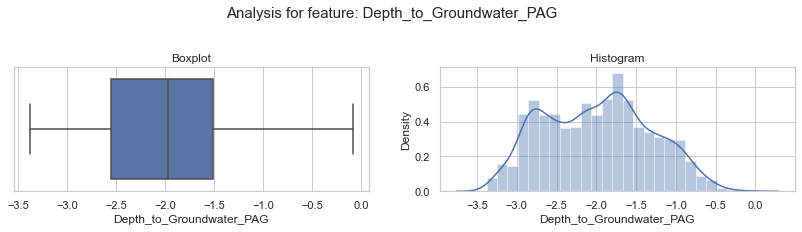

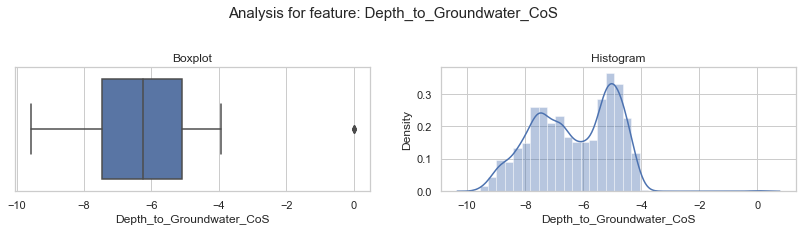

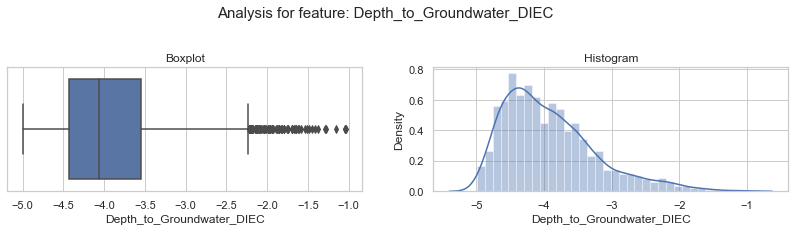

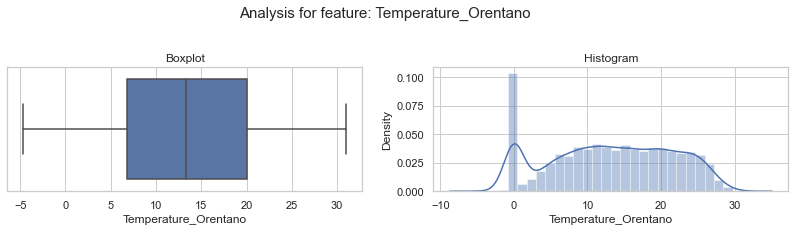

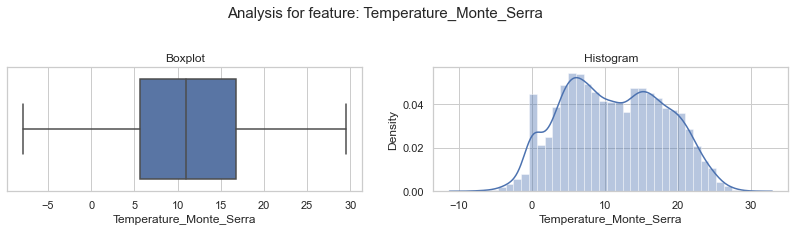

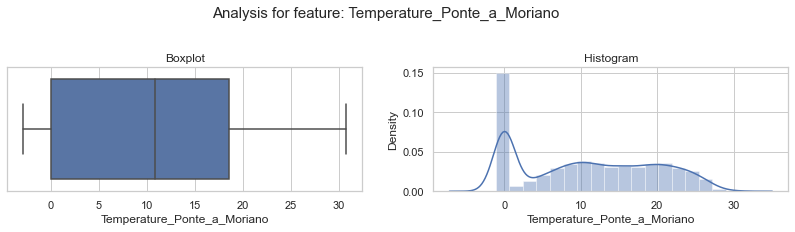

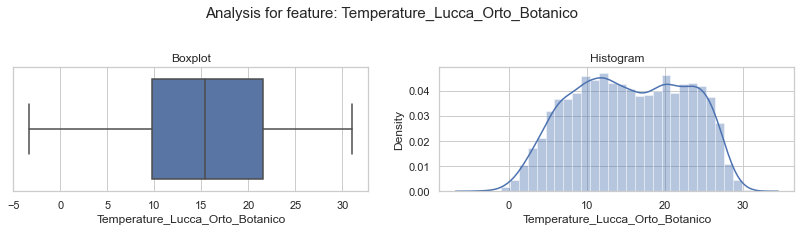

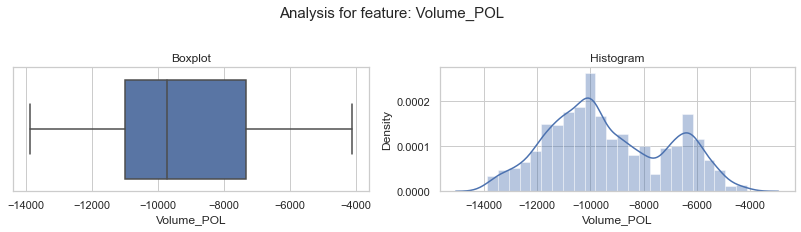

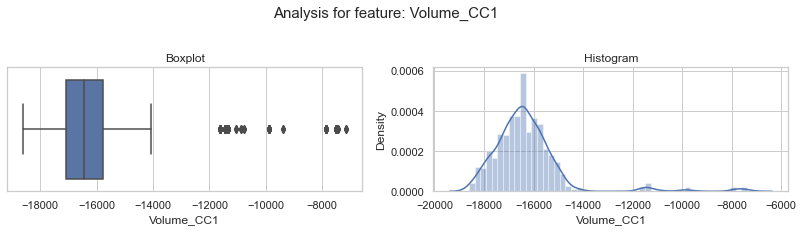

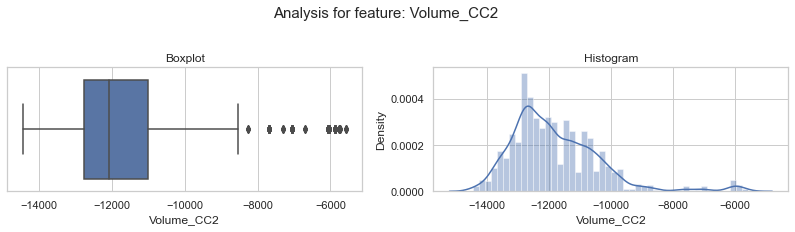

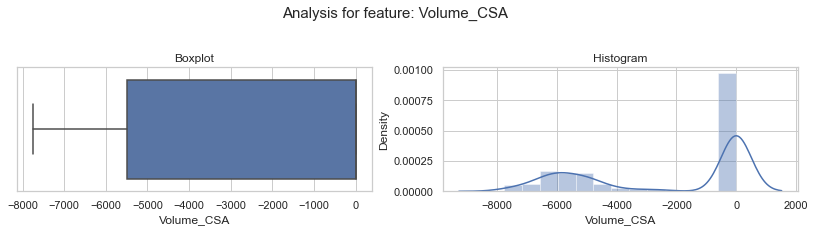

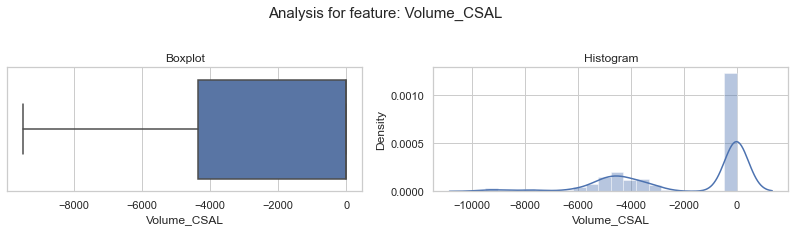

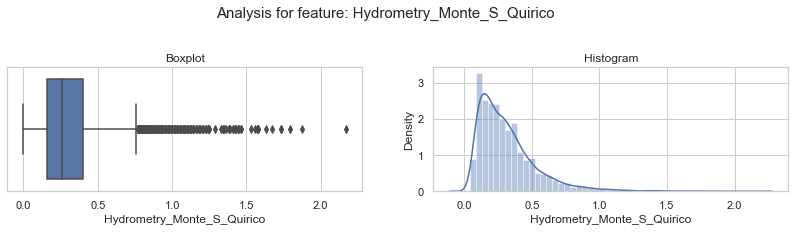

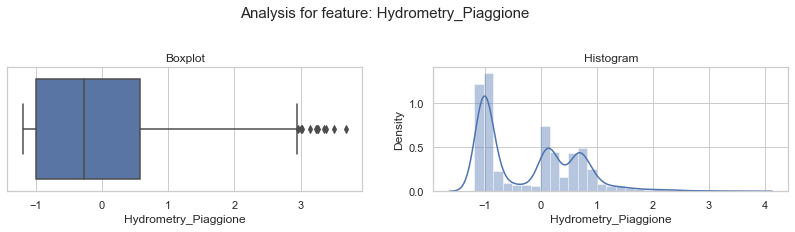



                                                   AQUIFER_DOGANELLA                                                   




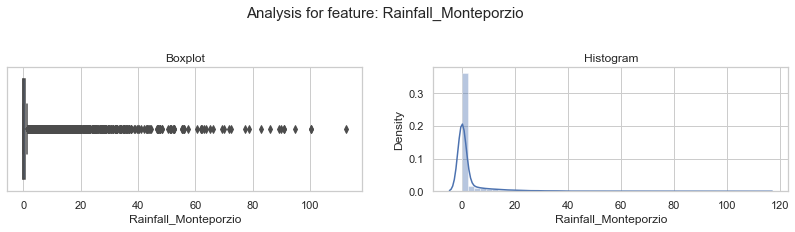

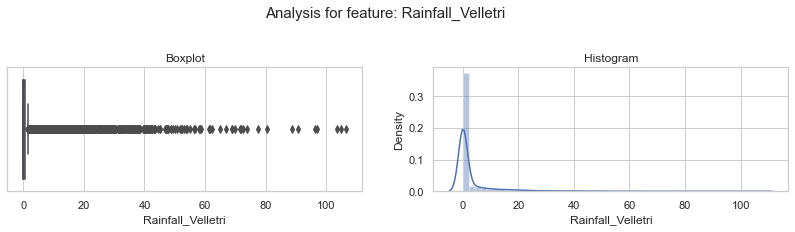

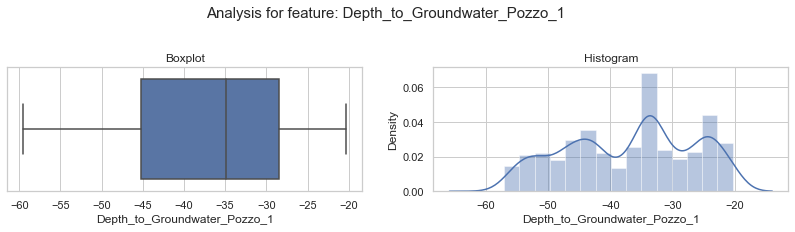

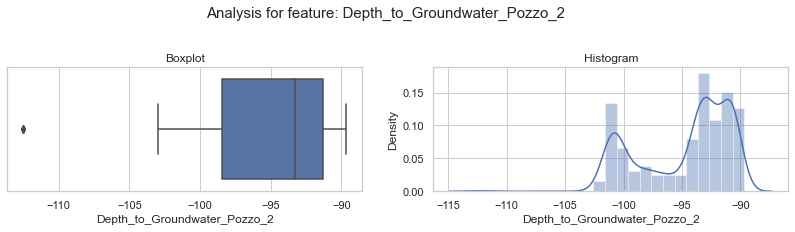

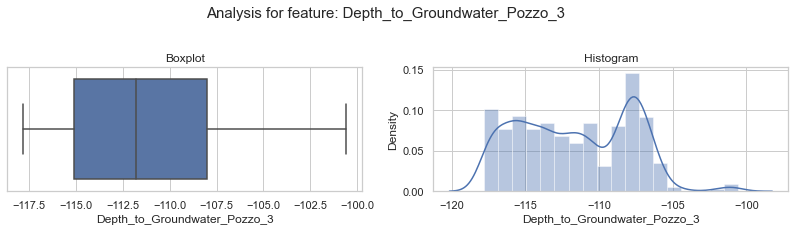

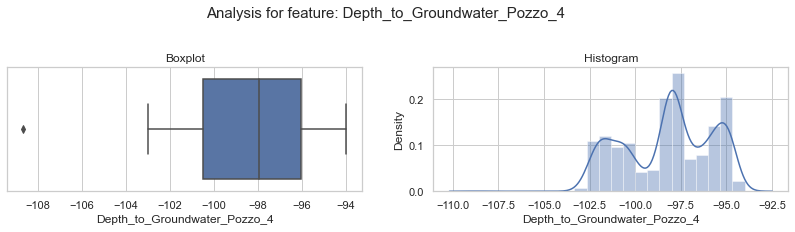

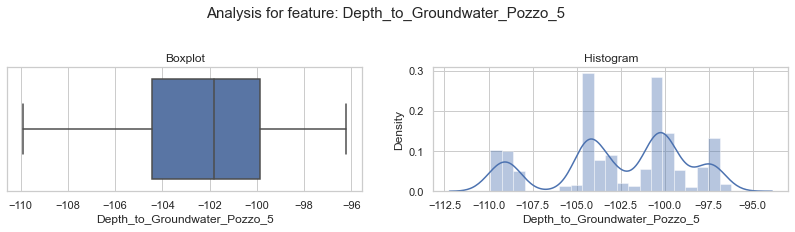

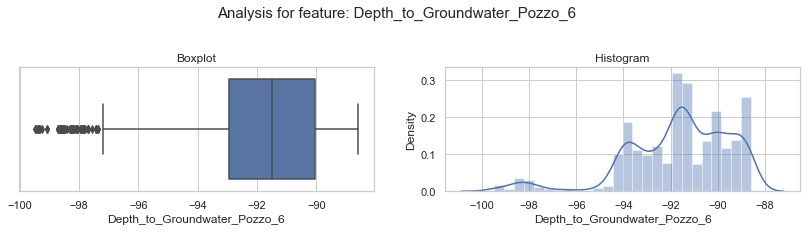

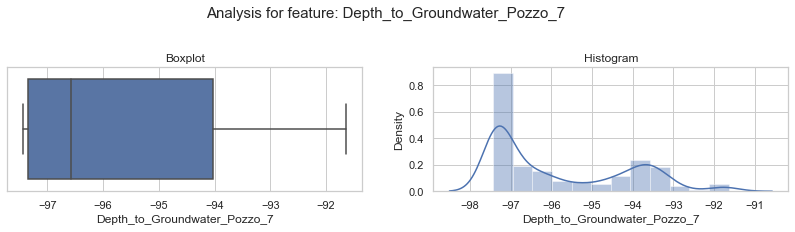

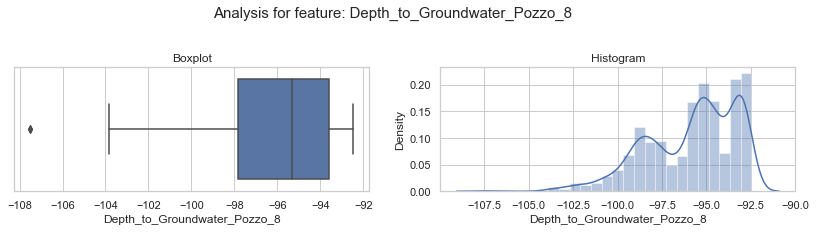

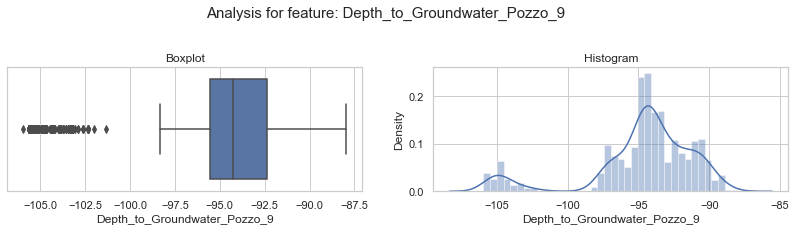

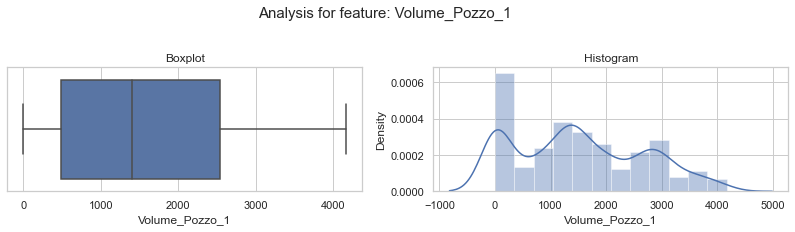

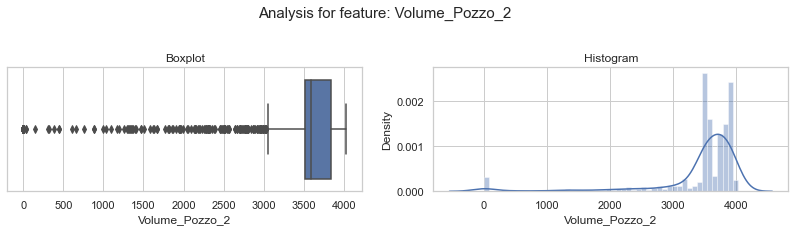

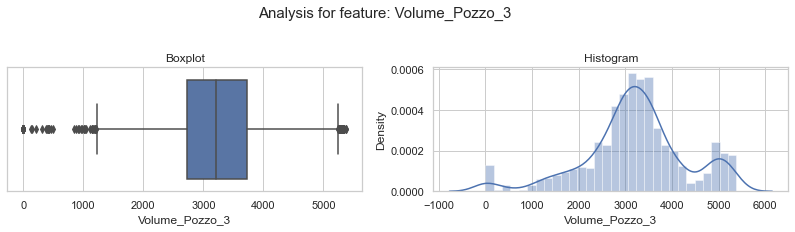

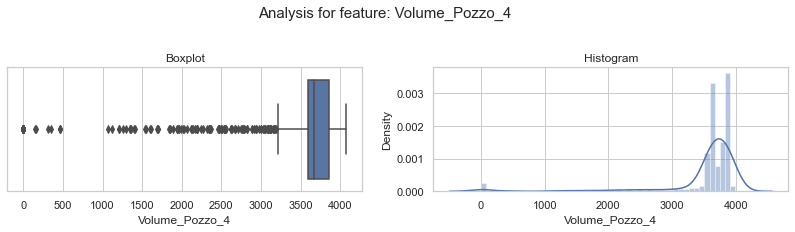

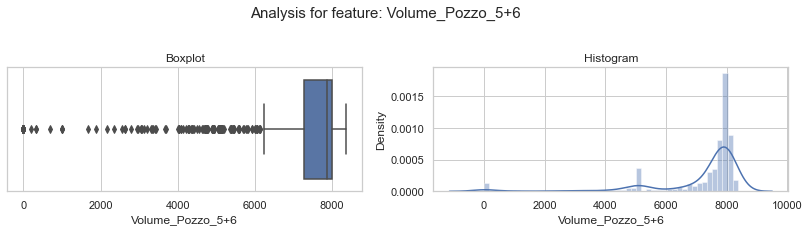

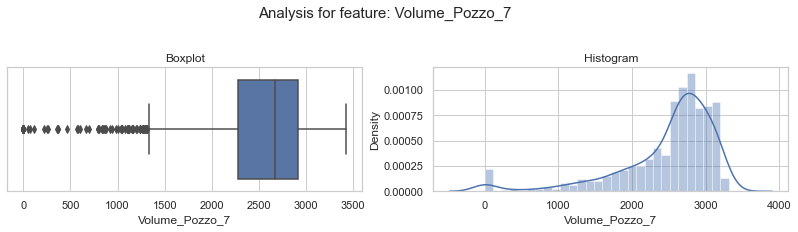

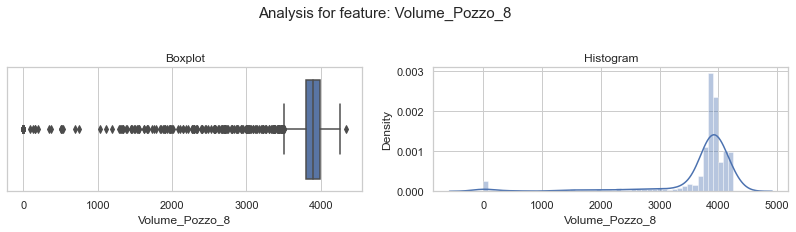

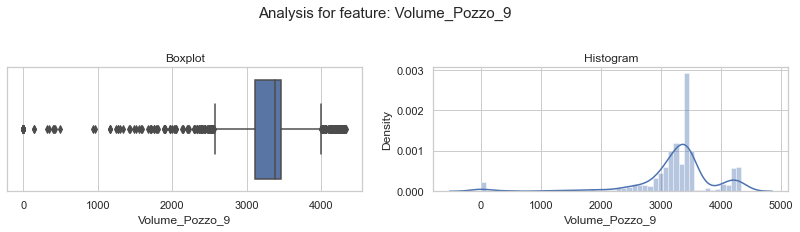

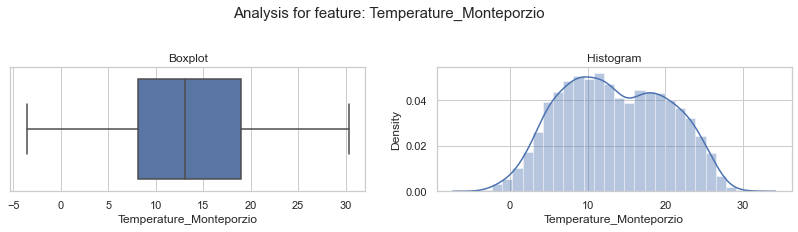

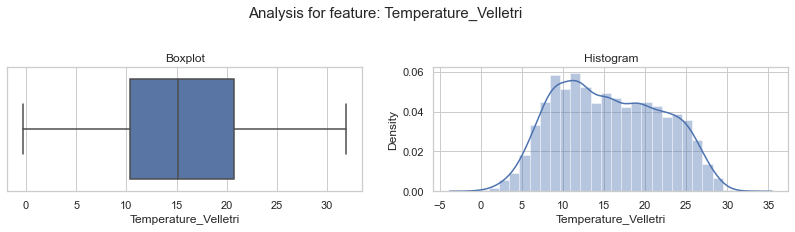



                                                   AQUIFER_LUCO                                                   




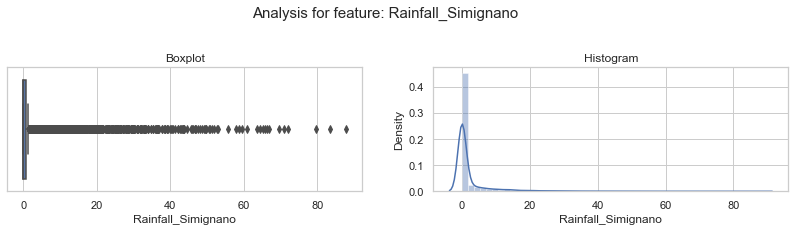

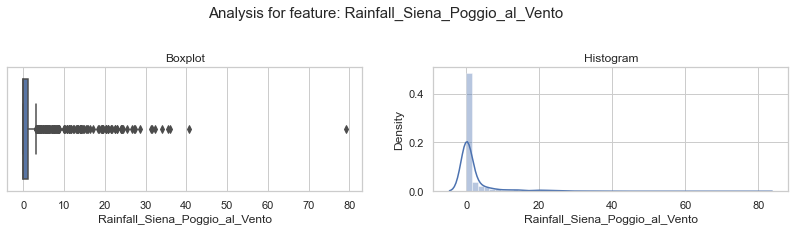

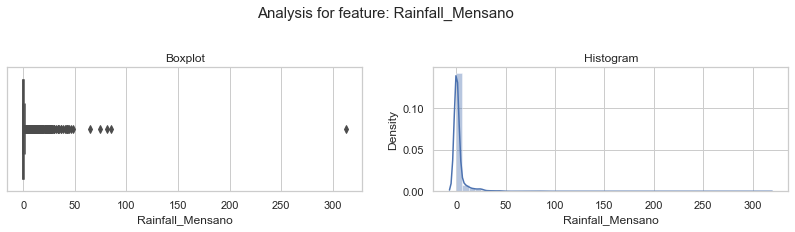

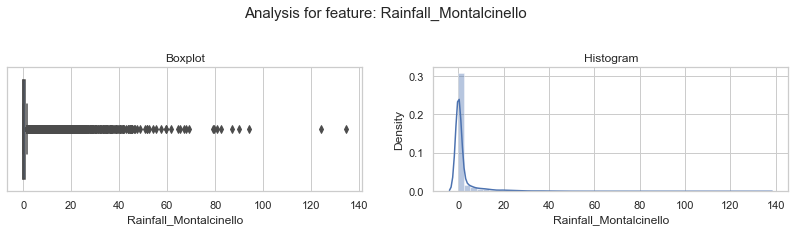

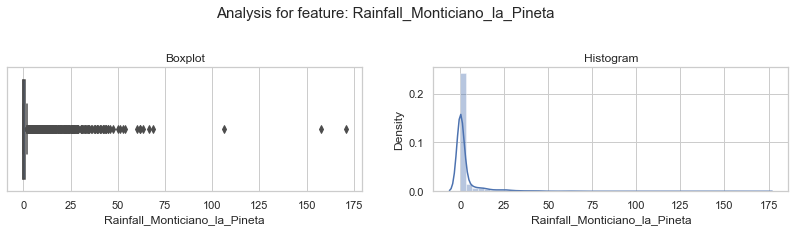

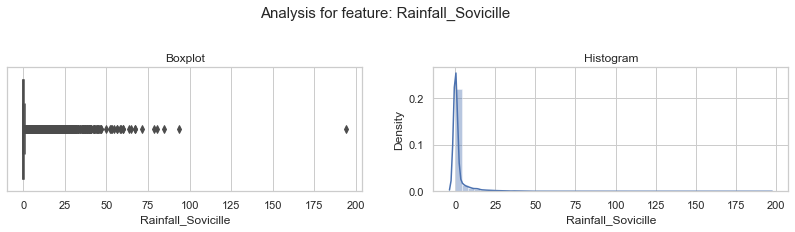

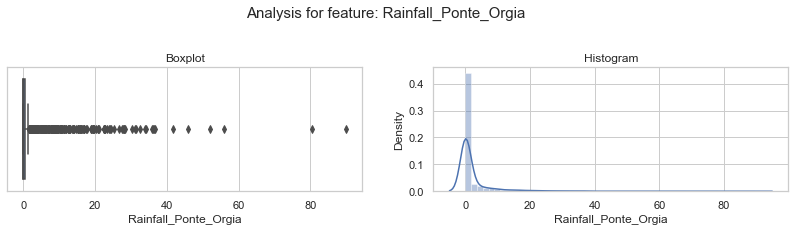

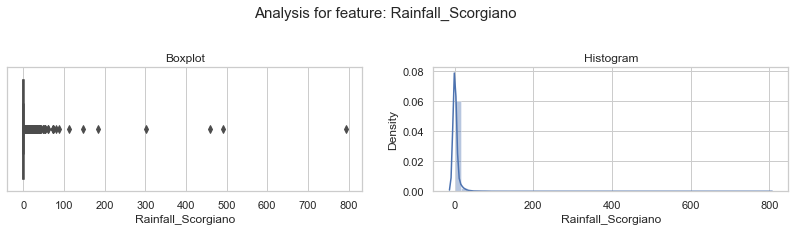

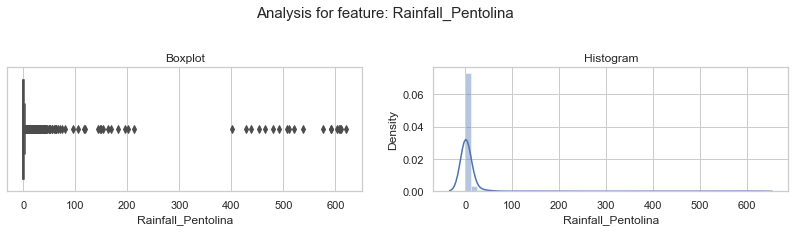

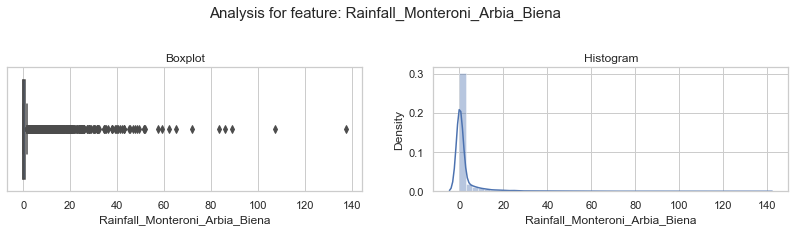

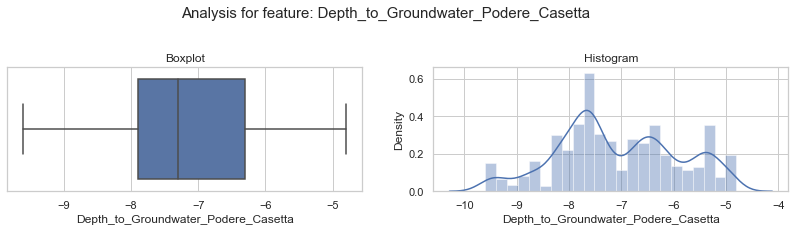

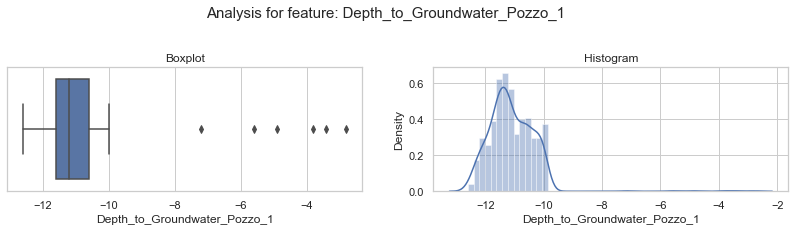

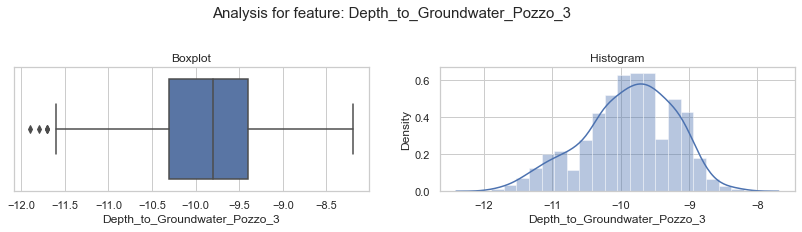

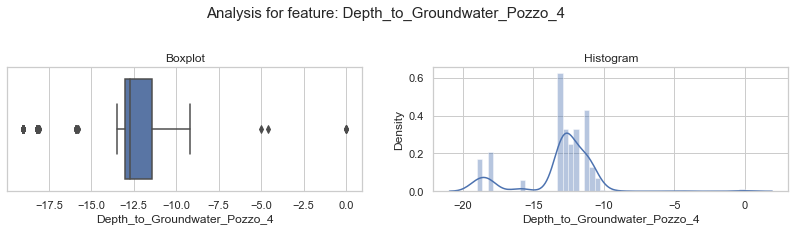

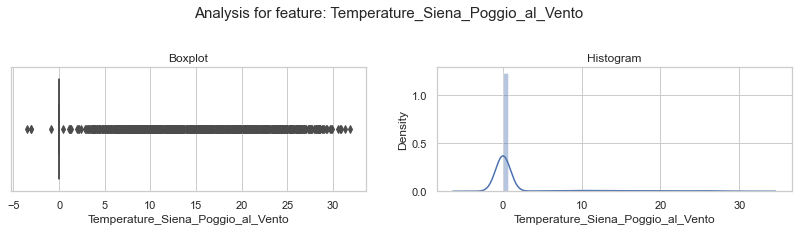

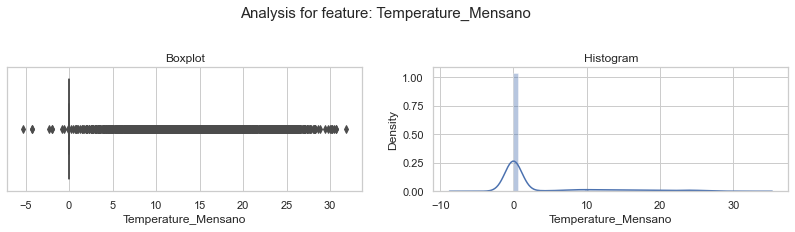

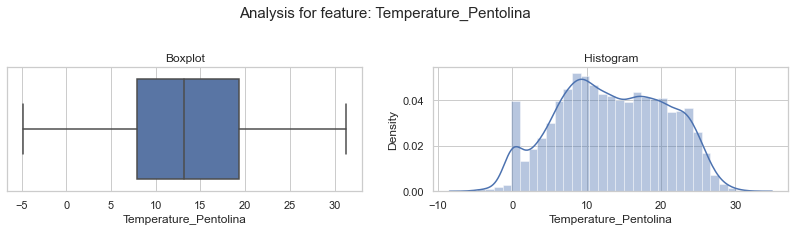

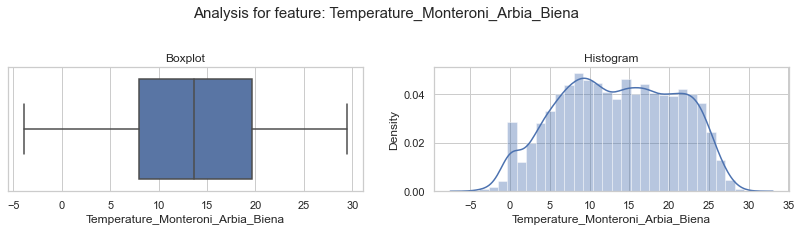

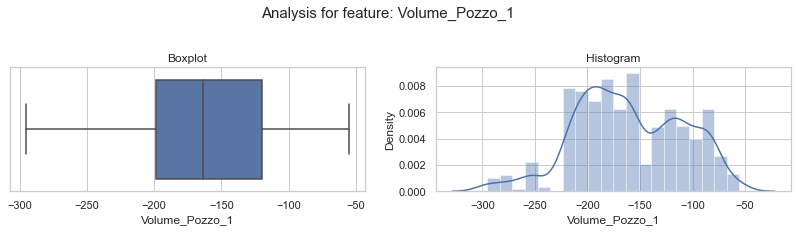

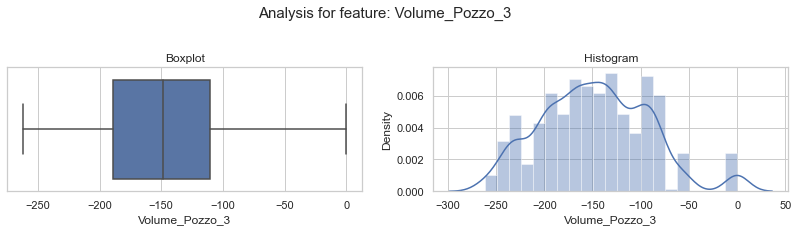

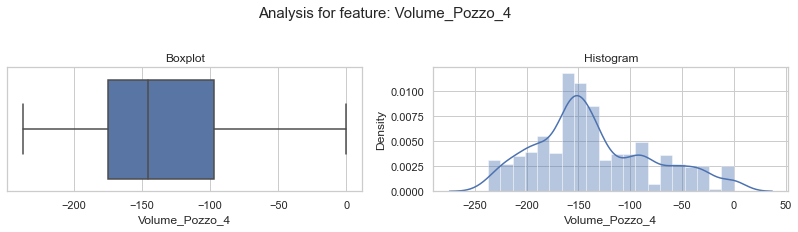



                                                   AQUIFER_PETRIGNANO                                                   




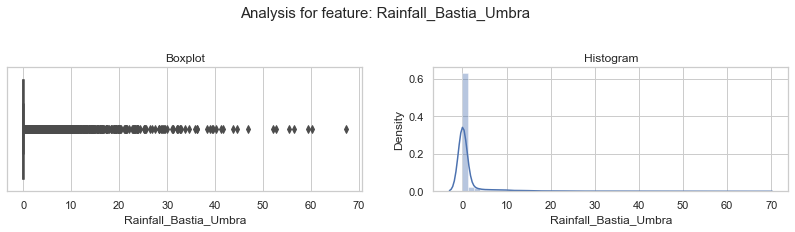

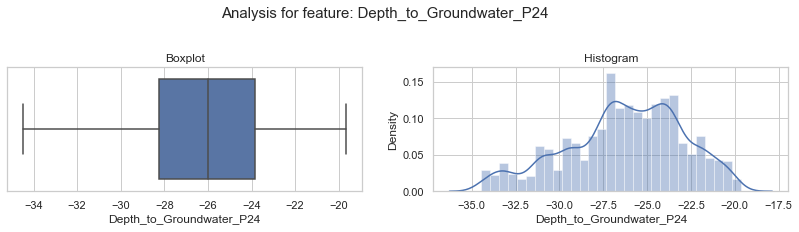

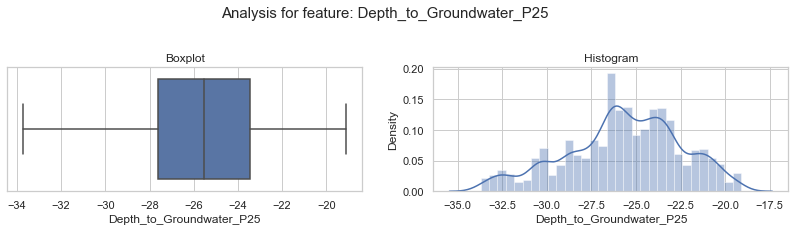

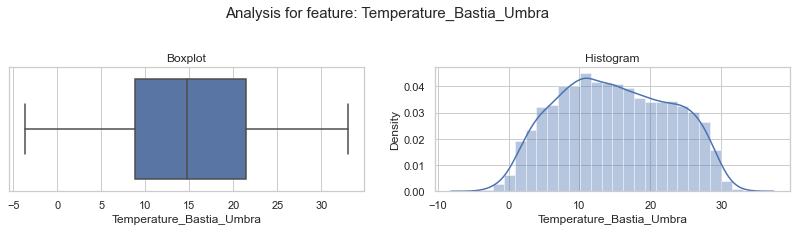

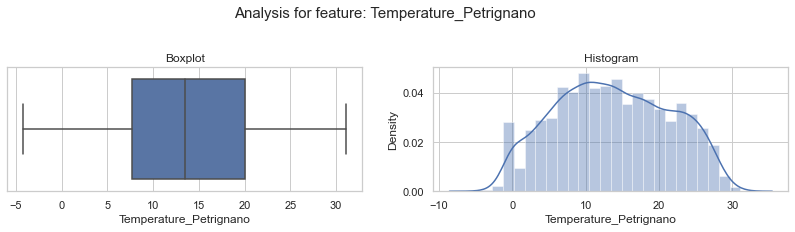

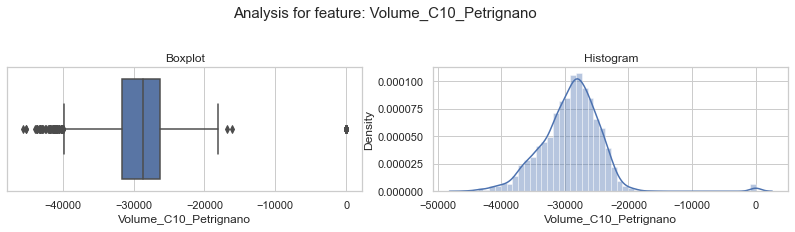

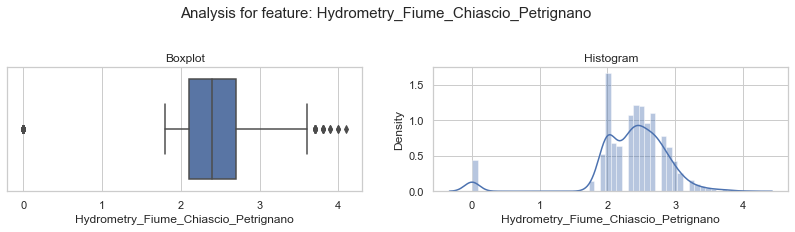



                                                   LAKE_BILANCINO                                                   




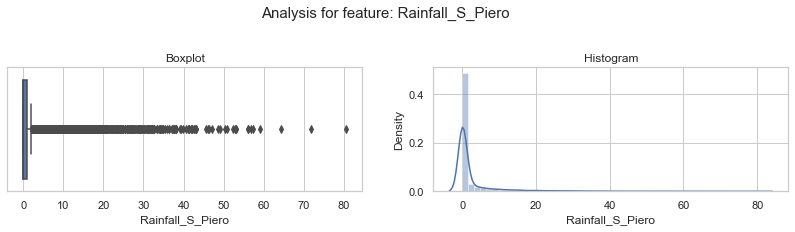

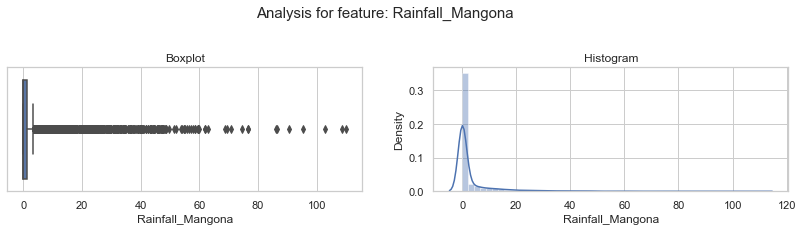

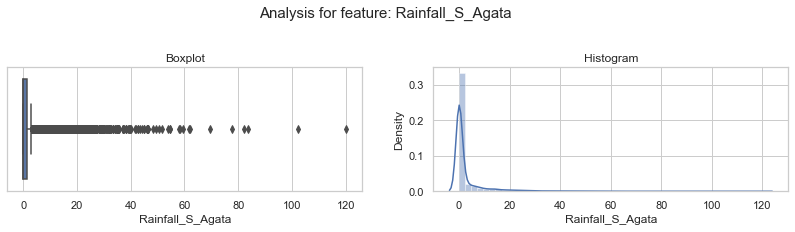

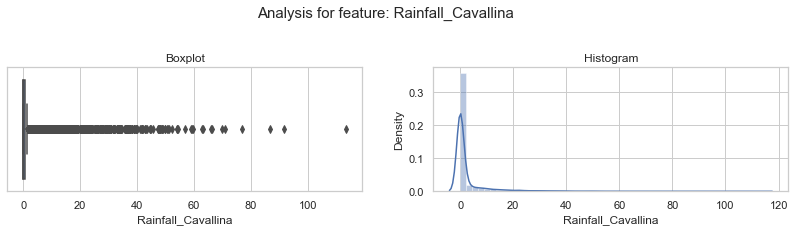

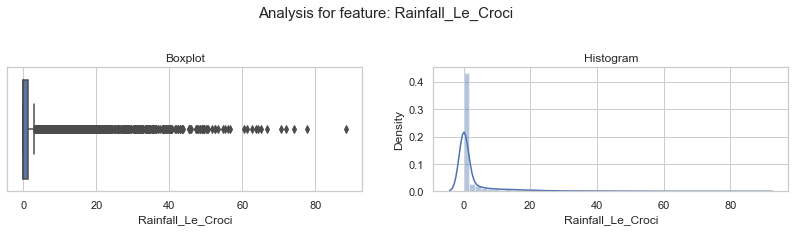

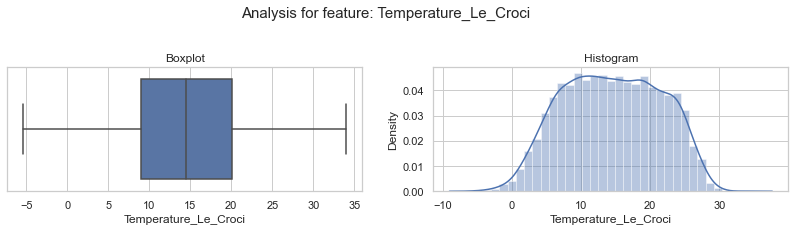

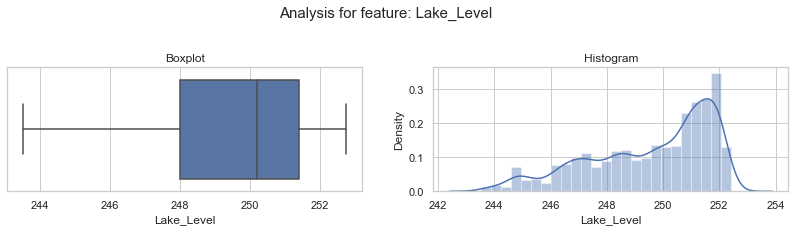

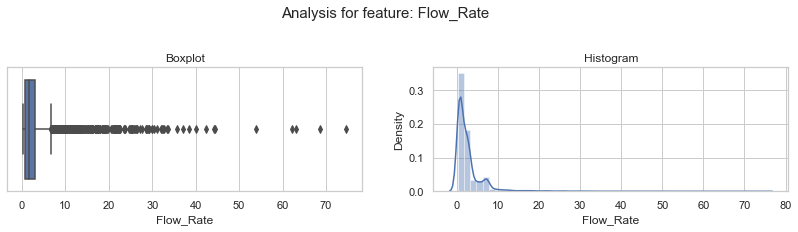



                                                   RIVER_ARNO                                                   




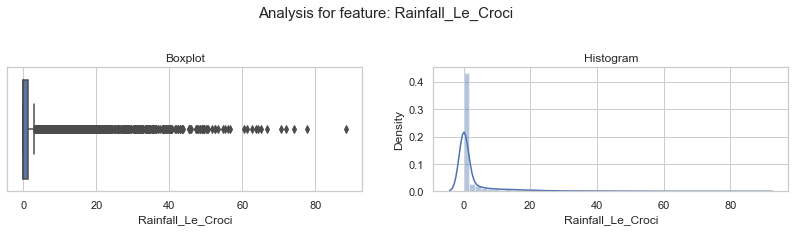

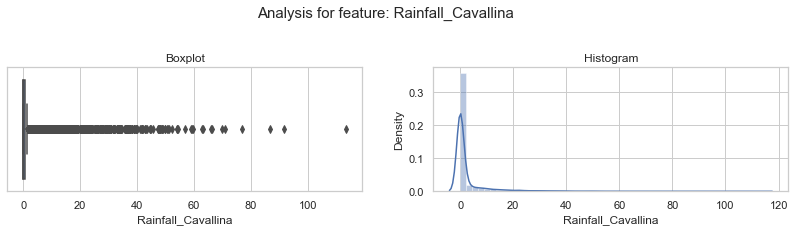

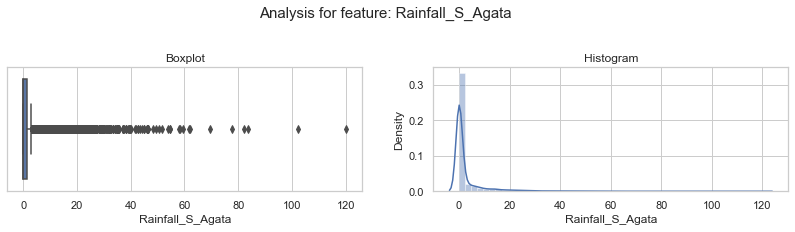

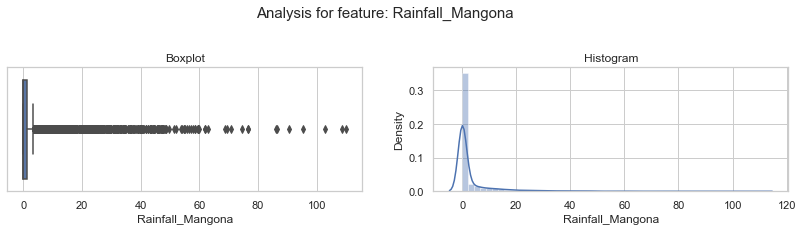

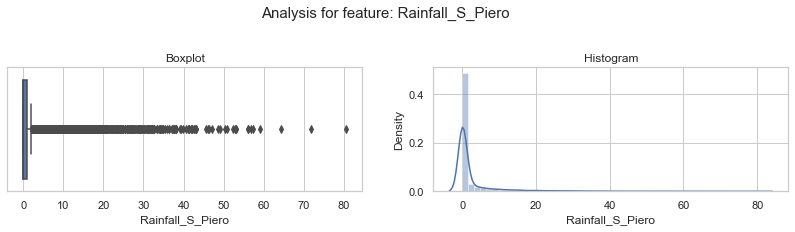

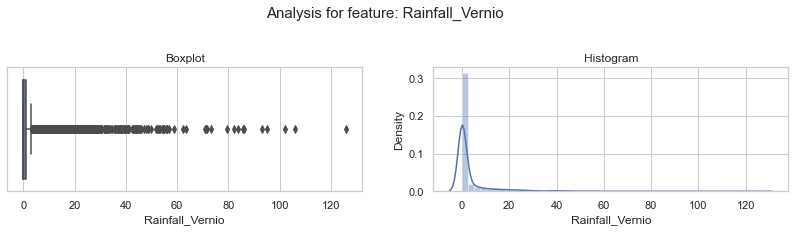

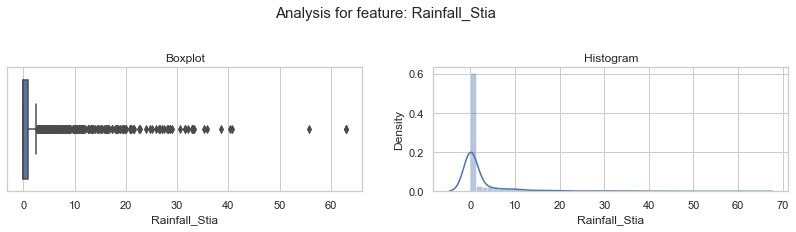

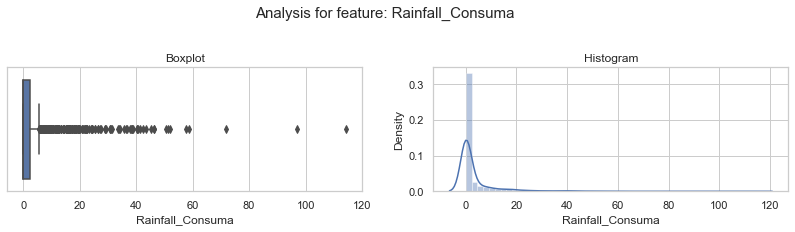

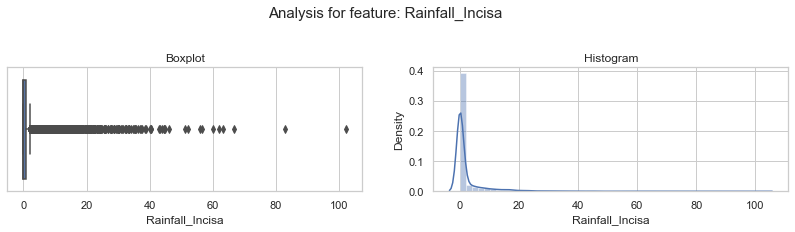

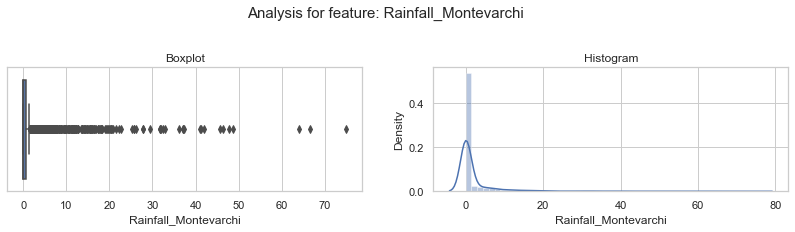

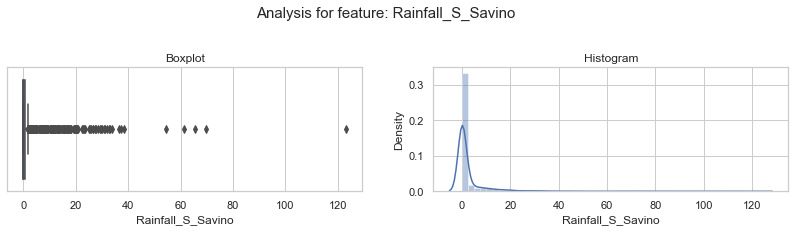

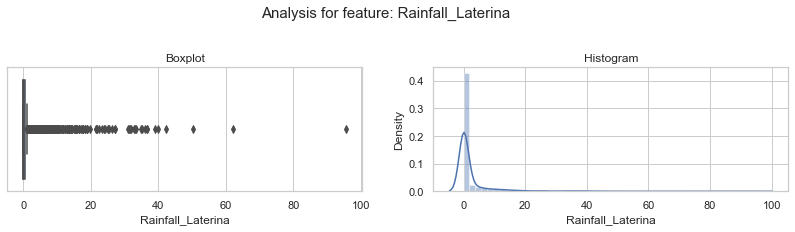

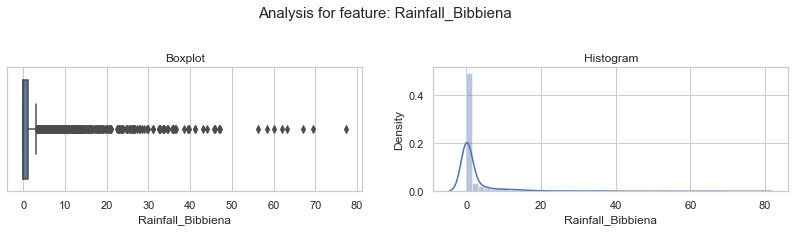

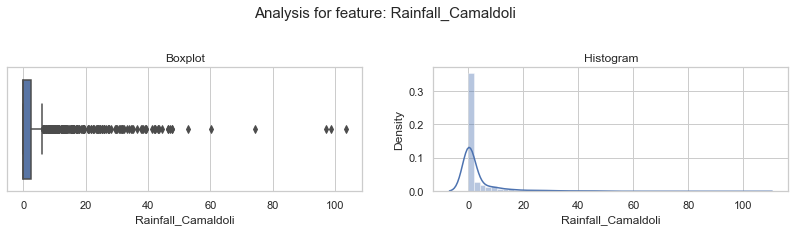

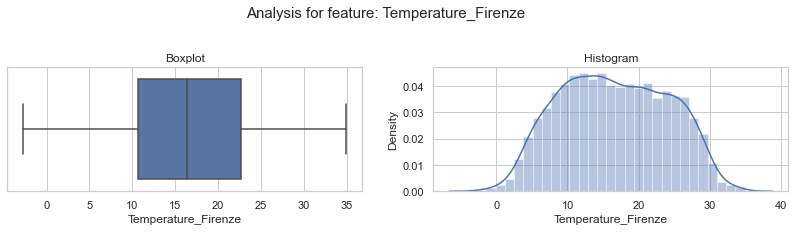

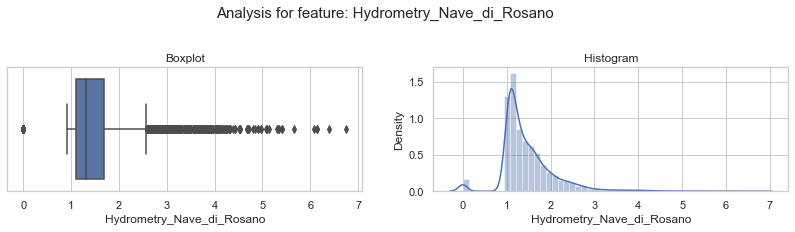



                                                   WATER_SPRING_AMIATA                                                   




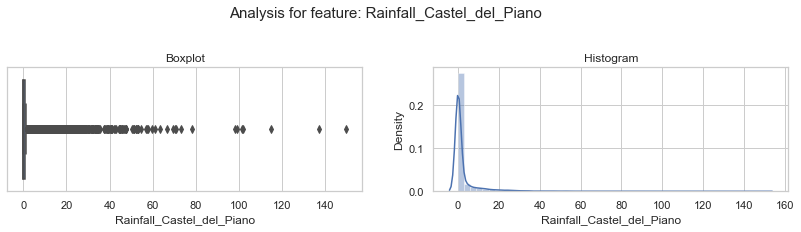

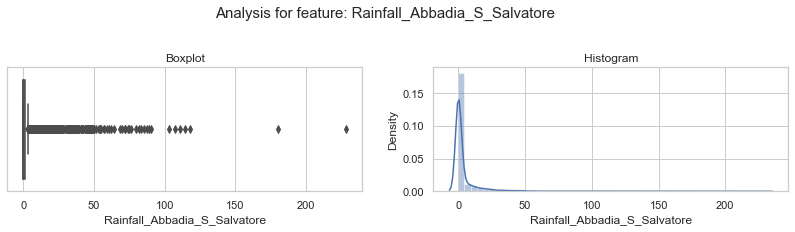

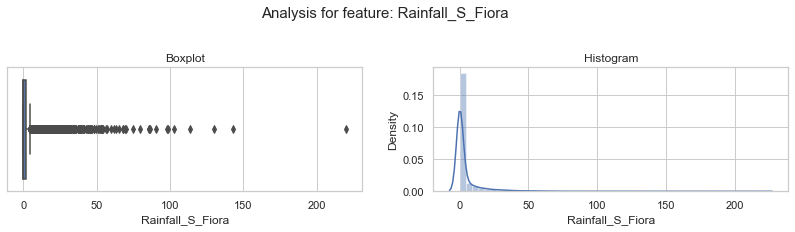

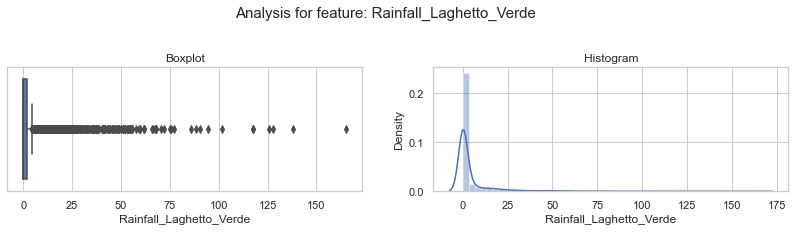

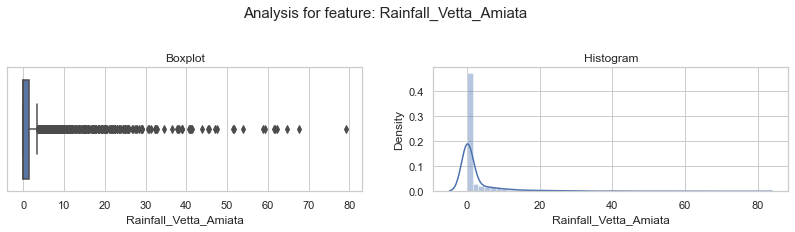

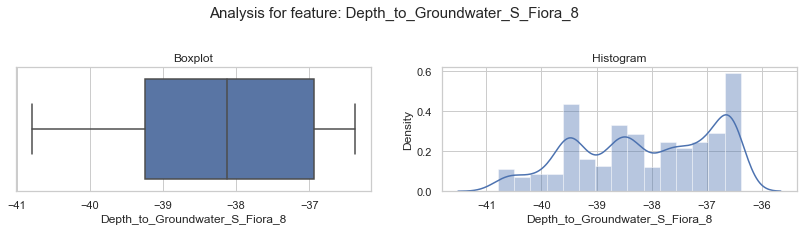

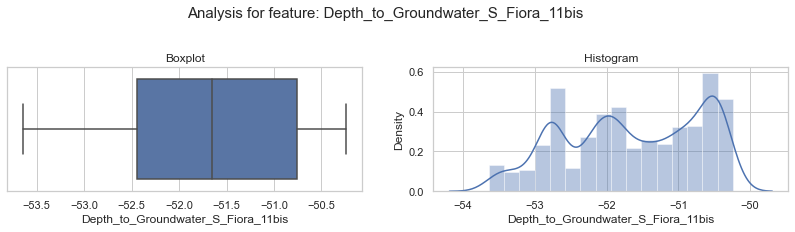

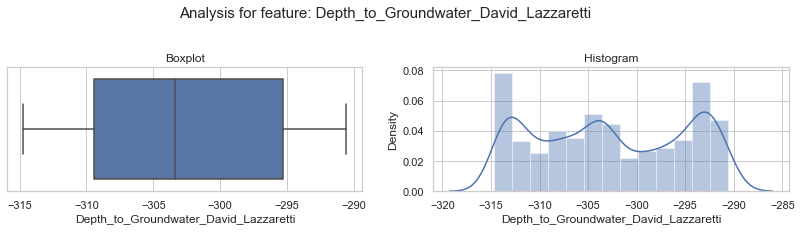

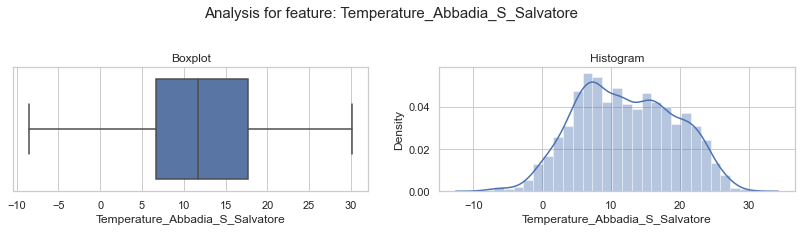

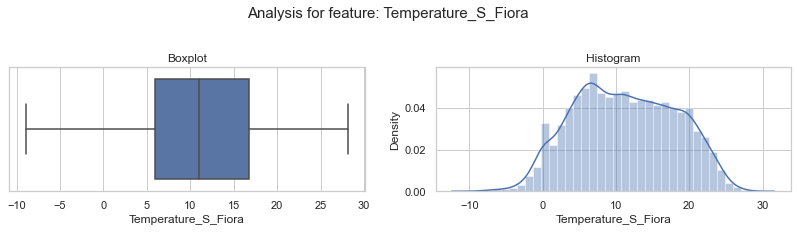

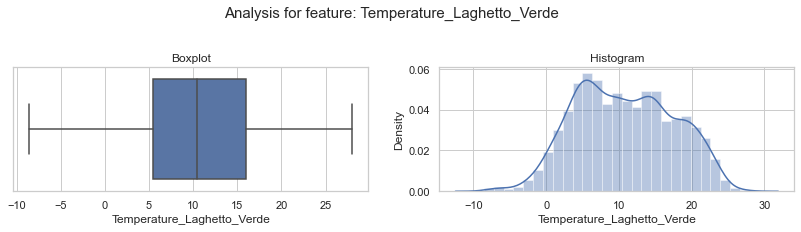

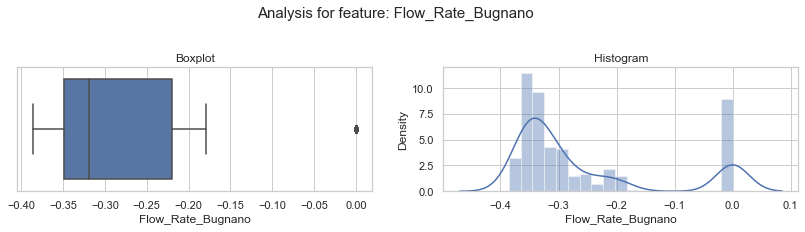

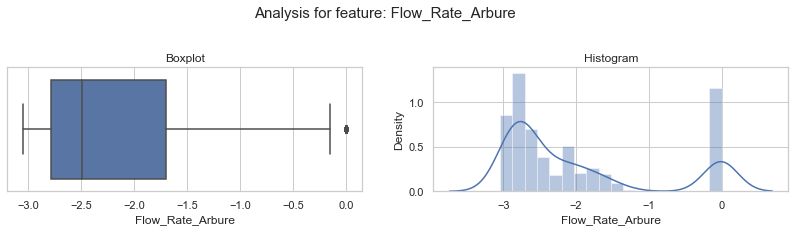

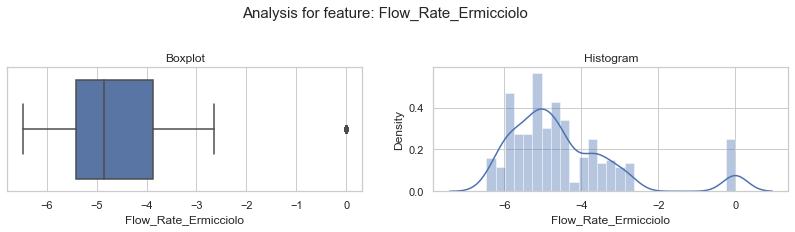

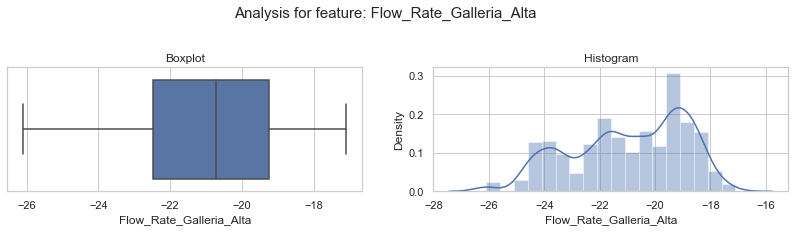



                                                   WATER_SPRING_LUPA                                                   




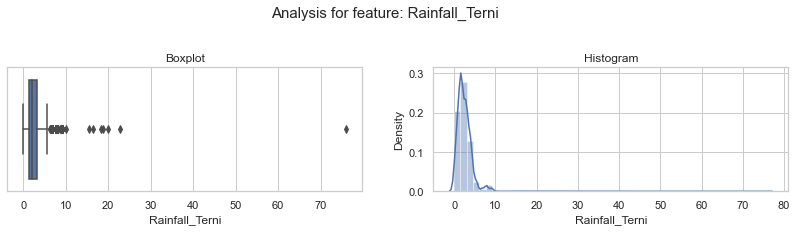

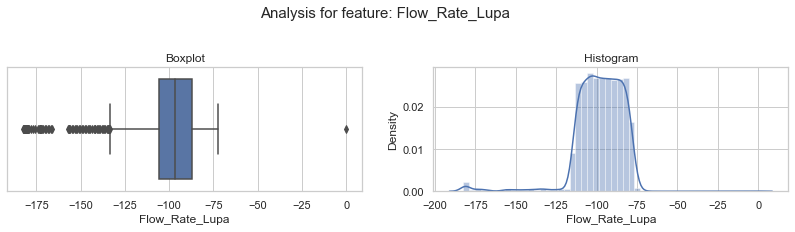



                                                   WATER_SPRING_MADONNA_DI_CANNETO                                                   




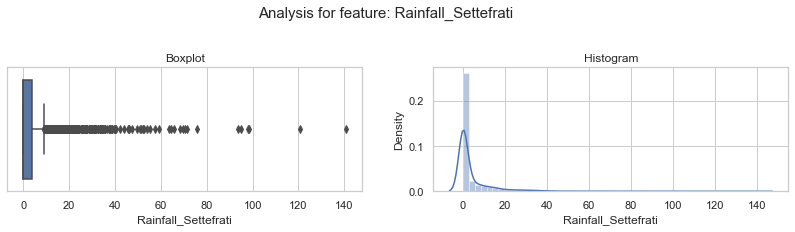

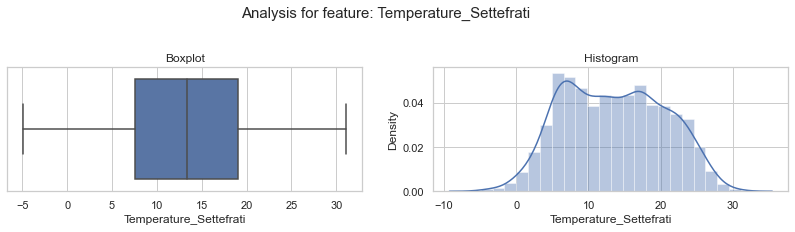

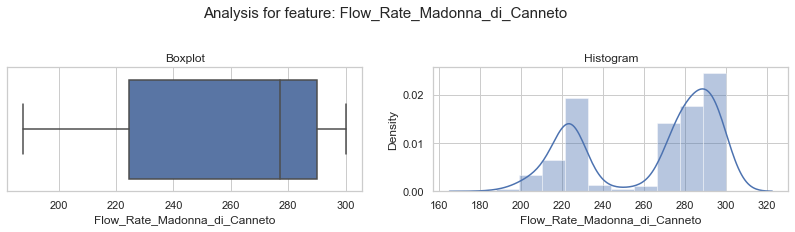

In [40]:
#iterate through the 9 datasets
#drop the column date for it is not a feature 
for wb in range(9):
    print('='*120)
    print('\n')
    print(' '*50,wb_names[wb].upper(),' '*50)
    print('\n')
    
    #remove the date feature
    dataset = wb_datasets[wb].drop(['Date'],axis=1)
    
    #for all features, plot the cdf, boxplot, histogram
    for col in dataset.columns:
        fig, axes = plt.subplots(1, 2, figsize = (14,3))
        fig.suptitle('Analysis for feature: '+col,fontsize=15)
        fig.subplots_adjust(top=0.7)
        sns.boxplot(dataset[col], ax = axes[0])
        sns.distplot(dataset[col], ax = axes[1])
        
        #set titles for each plot
        axes[0].set_title('Boxplot')
        axes[1].set_title('Histogram')
        plt.show()

## Observations

- The Aquifer Auser, more than 80% of data in the rainfall features lie below 10 mm, there are considerable number of outliers till range of upto 300mm. Depth to groundwater features are having a wider and peaked distribution of values within a few meters and fewer outliers. Temperature feature values are widely distributed over a few tens of degrees. There are no outliers. Volume_CSA and Volume_CSAL features have about 40% values less than -2000 cubic metres and rest of them are mostly around 0. Hydrometry feature values majorly vary between -1 to 1 meters and also some outliers.

- In Aquifer Doganella, more than 80% of data in the rainfall features lie below 10 mm, there are considerable number of outliers till range of upto 100mm. Depth to groundwater features are having a wider distribution of values with multiple peaks and within a few tens meters and fewer outliers. Temperature feature values are widely distributed over a few tens of degrees. There are no outliers. Volume features are mostly skewed and have lots of outliers. 

- In Aquifer Luco, more than 80% of data in the rainfall features lie below 10 mm, there are considerable number of outliers till range of upto 100mm. Depth to groundwater features are having a wider distribution of values with multiple peaks and within a few tens meters and fewer outliers. Temperature feature values are widely distributed over a few tens of degrees. There are no outliers. Volume features are well distributed with median volume about -150 cubic meters and don't have outliers. 

- In Aquifer Petrignano, all features are well distributed and don't have many outliers except for Rainfall_Bastia_Umbra, Volume_C10_Petrignano, Hydrometry_Fiume_Chiascio_Petrignano.

- In Lake Bilancino, rainfall features and flow rate features have majority of values concentrated in a small range lots of outliers. Temperature and lake level features are well distributed and have no outliers.

- In River Arno, more than 80% of data in the rainfall features lie below 5 mm, there are considerable number of outliers till range of upto 120 mm. Temperature feature values are widely distributed over a few tens of degrees. There are no outliers. Hydrometry feature values 80% are upto 2 meters and also has some outliers.

- In water spring amiata, more than 80% of data in the rainfall features lie below 5 mm, there are considerable number of outliers till range of upto 120 mm. Depth to groundwater, Temperature feature and flow rate values are multipeaked, widely distributed with minimal outliers.

## Target feature analysis

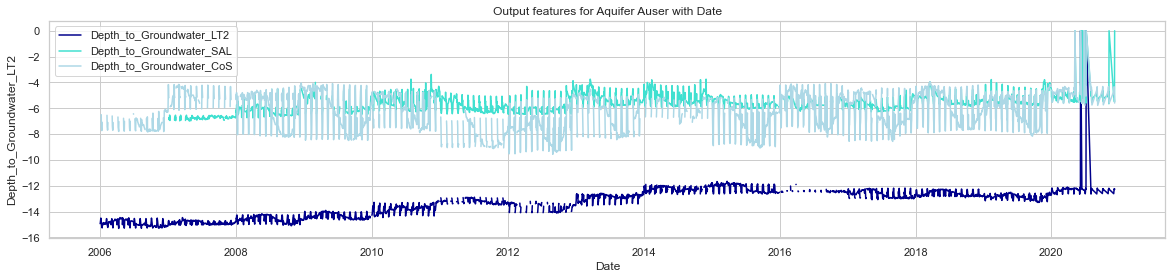

In [41]:
# Plot the depth to groundwater with date for Aquifer Auser
plt.figure(figsize=(20,4))
plt.title('Output features for Aquifer Auser with Date')
line_colors = ['darkblue','turquoise','lightblue']
for c,col in enumerate(['Depth_to_Groundwater_LT2', 'Depth_to_Groundwater_SAL','Depth_to_Groundwater_CoS']):
    sns.lineplot(x=pd.to_datetime(aquifer_auser['Date']),y=aquifer_auser[col].replace({np.nan : np.inf}),
                label=col,color=line_colors[c])

## Observations

- The Depth to groundwater of LT2 was the deepest in 2006 (earlier data is missing) at -15 m, then it is seen to be gradually decreasing over the years and around initial 2020 it hit the lowest for a brief period and then closed at around -12 meters.
- The Depth to groundwater of CoS lie somewhere in the range of -4 to -8 m throughout the years data and closes at -4 m.
- The Depth to groundwater of SAL was the deepest in 2006 (earlier data is missing) at -7 m, subsequently, the range varies between -4 to -8 over the years and in 2020, it is recorded approximately -7 

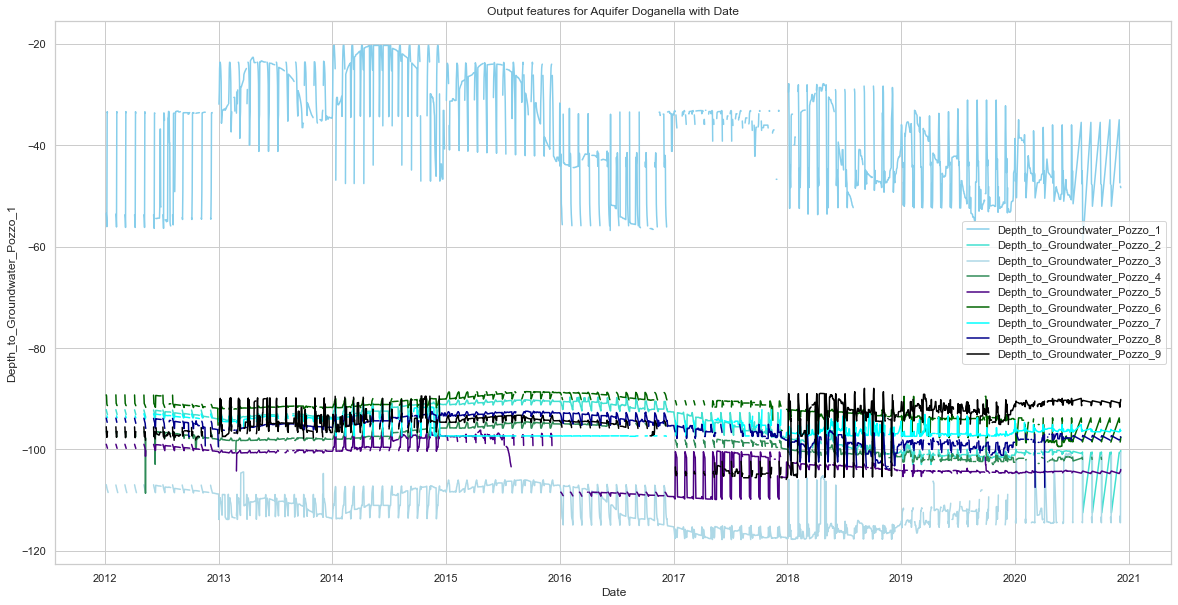

In [42]:
# Plot the depth to groundwater with date for Aquifer Doganella
plt.figure(figsize=(20,10))
plt.title('Output features for Aquifer Doganella with Date')
line_colors = ['skyblue','turquoise','lightblue','seagreen','indigo','darkgreen','aqua','darkblue','black']
for c,col in enumerate(['Depth_to_Groundwater_Pozzo_1', 'Depth_to_Groundwater_Pozzo_2', 'Depth_to_Groundwater_Pozzo_3', 'Depth_to_Groundwater_Pozzo_4',
               'Depth_to_Groundwater_Pozzo_5', 'Depth_to_Groundwater_Pozzo_6', 'Depth_to_Groundwater_Pozzo_7', 'Depth_to_Groundwater_Pozzo_8',
              'Depth_to_Groundwater_Pozzo_9']):
    sns.lineplot(x=pd.to_datetime(aquifer_doganella['Date']),y=aquifer_doganella[col].replace({np.nan : np.inf}),
                label=col,color=line_colors[c])